# Lending Club Case Study

----------------------------------------

In [1]:
#Importing the Python data  libraries
import numpy as np
import pandas as pd
#Importing the Python data  Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore') # to ignore the warnings

In [2]:
# Reading the data from csv file and loading it into dataframe
loan_dataframe = pd.read_csv('loan.csv')

### Data Summary:

In [3]:
#Finding the rows and columns of the dataframe ; expressed as (rows,columns)
loan_dataframe.shape

(39717, 111)

In [5]:
#Statistical summary of the data (Only Numeric columns)
loan_dataframe.describe() #Out of 111 columns, 87 of them are numeric-type

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [6]:
#StatisticalSummary of the Object-type of columns
loan_dataframe.describe(include='O') #There are 24 Object-type columns

term int_rate  grade sub_grade emp_title emp_length  \
count        39717    39717  39717     39717     37258      38642   
unique           2      371      7        35     28820         11   
top      36 months   10.99%      B        B3   US Army  10+ years   
freq         29096      956  12020      2917       134       8879   

       home_ownership verification_status issue_d loan_status  ...  \
count           39717               39717   39717       39717  ...   
unique              5                   3      55           3  ...   
top              RENT        Not Verified  Dec-11  Fully Paid  ...   
freq            18899               16921    2260       32950  ...   

                     title zip_code addr_state earliest_cr_line revol_util  \
count                39706    39717      39717            39717      39667   
unique               19615      823         50              526       1089   
top     Debt Consolidation    100xx         CA           Nov-98         0%   
freq                  2184      597       7099              370        977   

       initial_list_status last_pymnt_d next_pymnt_d last_credit_pull_d  \
count                39717        39646         1140              39715   
unique                   1          101            2                106   
top                      f       May-16       Jun-16             May-16   
freq                 39717         1256         1125              10308   

       application_type  
count             39717  
unique                1  
top          INDIVIDUAL  
freq              39717  

[4 rows x 24 columns]

### A. Data cleaning and handling

#### A.1 Check for any header & footer or summary rows present.Delete if present in the top and bottom section of the data frame

In [7]:
# Checking the head of the data frame
loan_dataframe.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [8]:
# Checking the tail of the dataframe
loan_dataframe.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN            NaN               NaN   
39713                NaN            NaN               NaN   
39714                NaN            NaN               NaN   
39715                NaN            NaN               NaN   
39716                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39716            NaN                        NaN  

[5 rows x 111 columns]

<span style='background:yellow'>With the above observations from head and tail of the dataframe, We found no header/footer or no summary rows (Total/Sub-Total rows etc) </span>

In [9]:
# A check on the unnecessary values in the Target Variable ('loan_status')
loan_dataframe.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [10]:
# Cleaning the records where loan_status = 'Current' as their loan tenure is not yet completed
# and the candidates are currently paying the installments
# Then storing the remaining records in the same dataframe

loan_dataframe = loan_dataframe[loan_dataframe['loan_status'] != 'Current']
print("Total number of rows after removing 'Current' loan status:", loan_dataframe.shape[0])

Total number of rows after removing 'Current' loan status: 38577


In [11]:
#check if there is any duplicate rows
duplicate_rows = loan_dataframe[loan_dataframe.duplicated()].shape[0]
print("Total number of duplicate rows count:", round(duplicate_rows,2))

Total number of duplicate rows count: 0


#### A.2 Delete the unnecessary columns

In [12]:
#Current Shape of the dataframe before column removal process
loan_dataframe.shape

(38577, 111)

In [13]:
#percentage of missing values in each column of the dataframe
100 * loan_dataframe.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [14]:
# List of columns having All Null Values(100 Percent)
list_of_null_columns = loan_dataframe.columns[(100 * loan_dataframe.isnull().mean()) == 100].tolist()
# Printing the list of null columns
print(list_of_null_columns,"\n")
# Printing the total count of columns having 100 percent null values
print("Total count of 100 percent null columns:",len(list_of_null_columns))

['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total

In [15]:
#So lets drop the columns with 100% Null Values as derived above
loan_dataframe = loan_dataframe.drop(list_of_null_columns, axis=1)
loan_dataframe.shape

(38577, 56)

In [15]:
# Rechecking the percentage of missing values in each column after the removal of above null columns
100 * loan_dataframe.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.185033
emp_length                     2.677761
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.477901
purpose                        0.000000
title                          0.028514
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [16]:
#Let's find the columns with more than 30% Null values
Null_greater_30_columns = loan_dataframe.columns[(100 * loan_dataframe.isnull().mean()) > 30].tolist()

#Again, as per industry practice, dropping the columns having more than 30% Null Values
loan_dataframe = loan_dataframe.drop(Null_greater_30_columns, axis=1)

In [17]:
#Checking the shape again
loan_dataframe.shape

(38577, 53)

In [18]:
#Finding number of unique values in each column with sorted columns
loan_dataframe.nunique().sort_values().head(20)

tax_liens                      1
initial_list_status            1
out_prncp                      1
out_prncp_inv                  1
collections_12_mths_ex_med     1
policy_code                    1
pymnt_plan                     1
application_type               1
acc_now_delinq                 1
chargeoff_within_12_mths       1
delinq_amnt                    1
loan_status                    2
term                           2
verification_status            3
pub_rec_bankruptcies           3
home_ownership                 5
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
dtype: int64

In [19]:
# Let's find out the list of columns having only 1 unique value from the above series
single_unique_value_list = loan_dataframe.columns[loan_dataframe.nunique() == 1]

#Dropping the columns having one unique value and assigning the remaining data to the same dataframe
loan_dataframe = loan_dataframe.drop(single_unique_value_list, axis=1)

In [20]:
#Checking the shape again to reconfirm the drop columns
loan_dataframe.shape

(38577, 42)

In [21]:
#Finding the list of columns having all the values as different as those unqiue values wont help in finding any pattern within the column
totally_unique_columns = [column for column in loan_dataframe.columns if loan_dataframe[column].nunique() == loan_dataframe.shape[0]]
totally_unique_columns

['id', 'member_id', 'url']

In [22]:
# Deleting the columns 'member_id' and 'url' as they won't contribute to this EDA analysis.
# And keeping only the 'id' column for analysis
loan_dataframe = loan_dataframe.drop(['url', 'member_id'], axis=1)

In [23]:
# Rechecking the shape for validation
loan_dataframe.shape

(38577, 40)

In [24]:
#Let's find out the columns containing the data which are captured post loan approval and wont be helpful in the loan approval process
#Hence eliminating these behavioural columns.

post_approval_columns=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 
                  'revol_bal', 'revol_util', 'total_acc', 'total_pymnt','total_pymnt_inv', 
                  'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                  'last_pymnt_d','last_credit_pull_d']

loan_dataframe=loan_dataframe.drop(post_approval_columns,axis=1)

In [25]:
# Rechecking the shape
loan_dataframe.shape

(38577, 22)

In [26]:
# Checking unique values count in the title column
loan_dataframe['title'].nunique() 

19297

In [27]:
# Checking unique values count in the emp title column
loan_dataframe['emp_title'].nunique()  

28027

In [28]:
# 1) We will limit our analysis till Group level only (we'll keep 'grade field only. Hence deleting the sub_grade column.
# 2) We will also delete the columns ('title', 'emp_title') which are having so many textual values as they  won't
#    contribute to EDA analysis.
     
loan_dataframe = loan_dataframe.drop(['title','sub_grade','emp_title'],  axis=1)
loan_dataframe.shape

(38577, 19)

In [29]:
# Doing row operation: Removing the rows which are having all columns values as NULL.
loan_dataframe = loan_dataframe.dropna(axis=0, how="all")
loan_dataframe

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1077501       5000         5000           4975.0   36 months   10.65%   
1      1077430       2500         2500           2500.0   60 months   15.27%   
2      1077175       2400         2400           2400.0   36 months   15.96%   
3      1076863      10000        10000          10000.0   36 months   13.49%   
5      1075269       5000         5000           5000.0   36 months    7.90%   
...        ...        ...          ...              ...         ...      ...   
39712    92187       2500         2500           1075.0   36 months    8.07%   
39713    90665       8500         8500            875.0   36 months   10.28%   
39714    90395       5000         5000           1325.0   36 months    8.07%   
39715    90376       5000         5000            650.0   36 months    7.43%   
39716    87023       7500         7500            800.0   36 months   13.75%   

       installment grade emp_length home_ownership  annual_inc  \
0           162.87     B  10+ years           RENT     24000.0   
1            59.83     C   < 1 year           RENT     30000.0   
2            84.33     C  10+ years           RENT     12252.0   
3           339.31     C  10+ years           RENT     49200.0   
5           156.46     A    3 years           RENT     36000.0   
...            ...   ...        ...            ...         ...   
39712        78.42     A    4 years       MORTGAGE    110000.0   
39713       275.38     C    3 years           RENT     18000.0   
39714       156.84     A   < 1 year       MORTGAGE    100000.0   
39715       155.38     A   < 1 year       MORTGAGE    200000.0   
39716       255.43     E   < 1 year            OWN     22000.0   

      verification_status issue_d  loan_status             purpose zip_code  \
0                Verified  Dec-11   Fully Paid         credit_card    860xx   
1         Source Verified  Dec-11  Charged Off                 car    309xx   
2            Not Verified  Dec-11   Fully Paid      small_business    606xx   
3         Source Verified  Dec-11   Fully Paid               other    917xx   
5         Source Verified  Dec-11   Fully Paid             wedding    852xx   
...                   ...     ...          ...                 ...      ...   
39712        Not Verified  Jul-07   Fully Paid    home_improvement    802xx   
39713        Not Verified  Jul-07   Fully Paid         credit_card    274xx   
39714        Not Verified  Jul-07   Fully Paid  debt_consolidation    017xx   
39715        Not Verified  Jul-07   Fully Paid               other    208xx   
39716        Not Verified  Jun-07   Fully Paid  debt_consolidation    027xx   

      addr_state    dti  pub_rec_bankruptcies  
0             AZ  27.65                   0.0  
1             GA   1.00                   0.0  
2             IL   8.72                   0.0  
3             CA  20.00                   0.0  
5             AZ  11.20                   0.0  
...          ...    ...                   ...  
39712         CO  11.33                   NaN  
39713         NC   6.40                   NaN  
39714         MA   2.30                   NaN  
39715         MD   3.72                   NaN  
39716         MA  14.29                   NaN  

[38577 rows x 19 columns]

### B. Data Conversion

In [30]:
#Let's check the datatypes of all the remaining columns
loan_dataframe.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [31]:
#Converting the datatype of int_rate from object to float
loan_dataframe.int_rate =loan_dataframe.int_rate.apply(lambda x: float(x.replace("%","")))

In [32]:
#Checking the data type again for int_rate
loan_dataframe.int_rate.dtype

dtype('float64')

In [33]:
#Confirming the removal of % and data type from the int rate values
loan_dataframe.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

In [34]:
#Converting the datatype of term from object to int
loan_dataframe["term"].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [35]:
#Converting the datatype of term from object to int 
loan_dataframe.term = loan_dataframe.term.apply(lambda x: int(x.replace(" months","")))

In [36]:
#Confirming the removal of text ' months' and data type from the term values
loan_dataframe["term"].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [37]:
# Converting the columns funded_amnt and  loan_amnt from int to float64 datatype
loan_dataframe = loan_dataframe.astype({'loan_amnt':'float','funded_amnt':'float'})
loan_dataframe.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501     5000.0       5000.0           4975.0    36     10.65   
1  1077430     2500.0       2500.0           2500.0    60     15.27   
2  1077175     2400.0       2400.0           2400.0    36     15.96   
3  1076863    10000.0      10000.0          10000.0    36     13.49   
5  1075269     5000.0       5000.0           5000.0    36      7.90   

   installment grade emp_length home_ownership  annual_inc  \
0       162.87     B  10+ years           RENT     24000.0   
1        59.83     C   < 1 year           RENT     30000.0   
2        84.33     C  10+ years           RENT     12252.0   
3       339.31     C  10+ years           RENT     49200.0   
5       156.46     A    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-11   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-11  Charged Off             car    309xx   
2        Not Verified  Dec-11   Fully Paid  small_business    606xx   
3     Source Verified  Dec-11   Fully Paid           other    917xx   
5     Source Verified  Dec-11   Fully Paid         wedding    852xx   

  addr_state    dti  pub_rec_bankruptcies  
0         AZ  27.65                   0.0  
1         GA   1.00                   0.0  
2         IL   8.72                   0.0  
3         CA  20.00                   0.0  
5         AZ  11.20                   0.0

In [38]:
#Changing the datatype of issue_d from object type to datetime type
loan_dataframe['issue_d'] = pd.to_datetime(loan_dataframe.issue_d, format='%b-%y')
loan_dataframe['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

### C. Handling the missing values

In [39]:
# Let's find out the missing value percentage in each column of the data frame
100 * loan_dataframe.isnull().mean()

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [40]:
# Dropping the rows instead of imputing the emp_length and pub_rec_bankruptcies columns due to below reasons: 
# 1. emp_length column is already a categorical column and imputing the missing values with 'Mode' of the column may lead to biasing 
# 2. pub_rec_bankruptcies, even though it is an integer column, but since the number of unqiue values are very less and repeating, we can
# consider it as a categorical columnand again imputing the values will lead to biasing to certain extent
loan_dataframe = loan_dataframe.dropna(how = 'any')
loan_dataframe.shape

(36847, 19)

In [41]:
# Confirming if there are no null values left in any column
100 * loan_dataframe.isnull().mean()

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

### D. Derived Variables (Columns)

In [42]:
# Deriving the Year and Month columns out of the 'issue_date' column and adding it to the existing dataframe
loan_dataframe["issue_yr"] = pd.DatetimeIndex(loan_dataframe["issue_d"]).year
loan_dataframe["issue_mon"] = pd.DatetimeIndex(loan_dataframe["issue_d"]).month

In [43]:
#Rechecking the head and verifying the added columns
loan_dataframe.head(2)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501     5000.0       5000.0           4975.0    36     10.65   
1  1077430     2500.0       2500.0           2500.0    60     15.27   

   installment grade emp_length home_ownership  ...  verification_status  \
0       162.87     B  10+ years           RENT  ...             Verified   
1        59.83     C   < 1 year           RENT  ...      Source Verified   

     issue_d  loan_status      purpose zip_code addr_state    dti  \
0 2011-12-01   Fully Paid  credit_card    860xx         AZ  27.65   
1 2011-12-01  Charged Off          car    309xx         GA   1.00   

   pub_rec_bankruptcies  issue_yr  issue_mon  
0                   0.0      2011         12  
1                   0.0      2011         12  

[2 rows x 21 columns]

In [44]:
#Checking the final shape of the dataframe before going for Univariate, Segmented Univariate and Bivariate Anbalysis
loan_dataframe.shape

(36847, 21)

## E.Univariate Analysis

### E.1 Univariate Analysis on Numeric cols

__Plotting the box plot of Numerical columns with outliers__

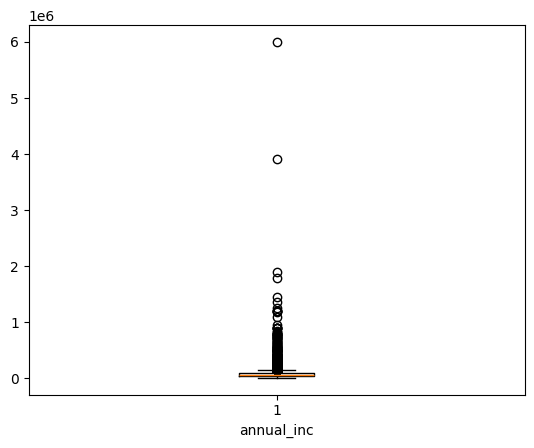

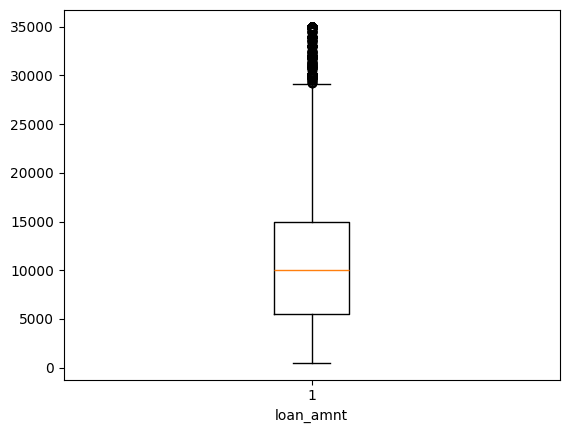

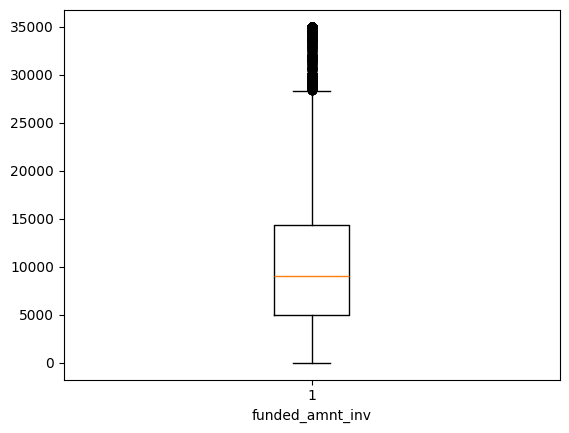

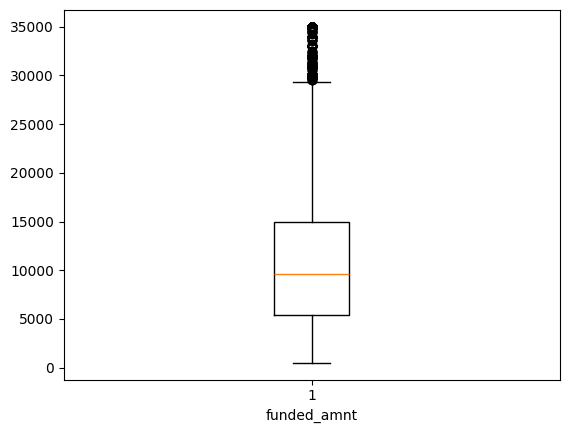

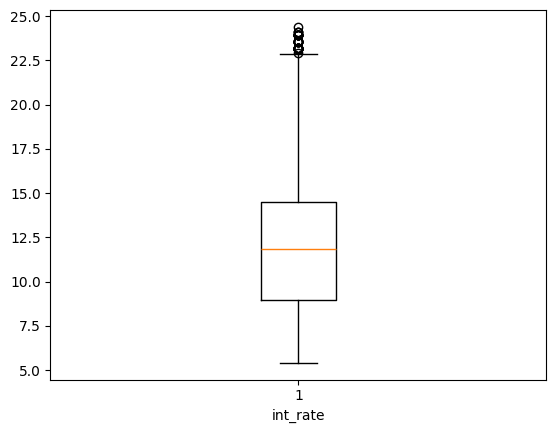

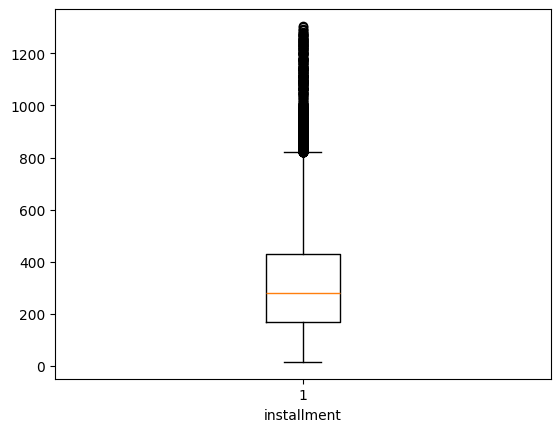

In [45]:
num_cols = ['annual_inc','loan_amnt', 'funded_amnt_inv', 'funded_amnt', 'int_rate', 'installment']

for cols in num_cols:
    plt.boxplot(loan_dataframe[cols])
    plt.xlabel(cols)
    plt.show()

In [46]:
# We observe the outliers present in the columns 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 
# 'int_rate', 'installment', 'annual_inc'. Hence removing the outliers

out_cols_list = ['annual_inc','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment']

# Function to remove outliers based on IQR
def rem_outlrs(data, columns,threshhold):
    for cols in columns:
        Q1 = data[cols].quantile(0.25)
        Q3 = data[cols].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - threshhold * IQR
        upper_fence = Q3 + threshhold * IQR
        data = data[(data[cols] >= lower_fence) & (data[cols] <= upper_fence)]
    return data

# Calling the function to remove outliers from the DataFrame
loan_dataframe =rem_outlrs(loan_dataframe, out_cols_list,1.5)

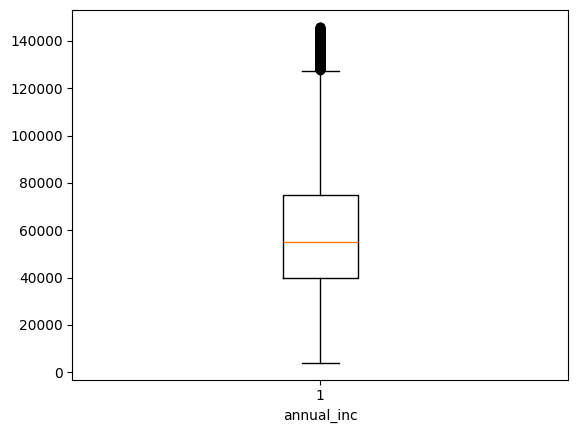

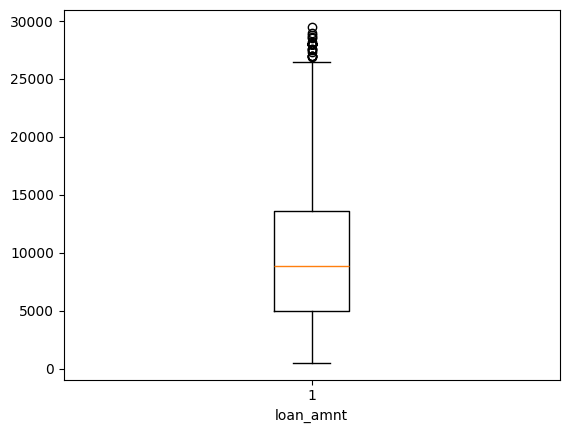

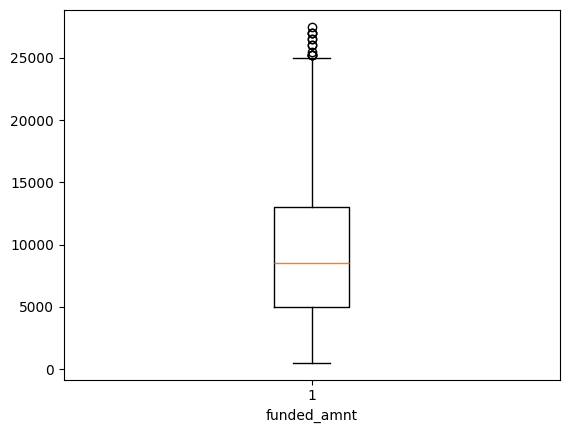

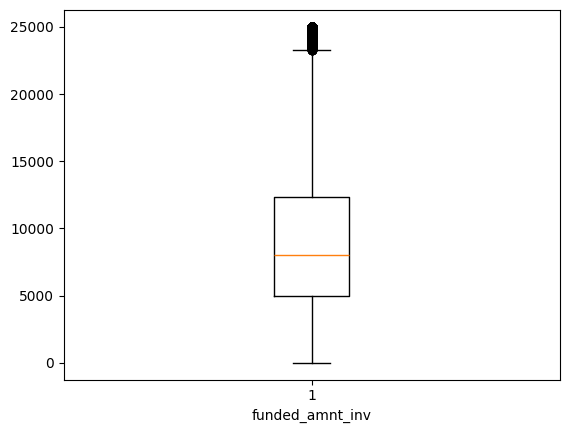

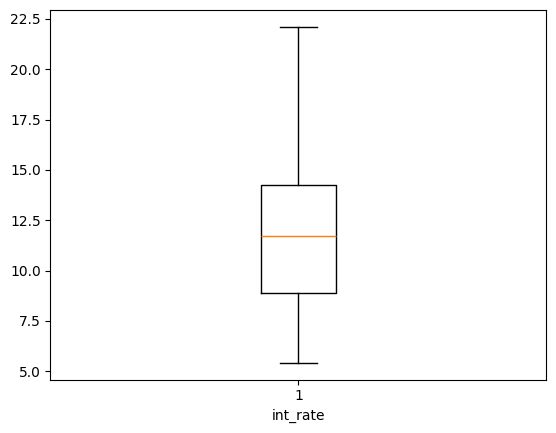

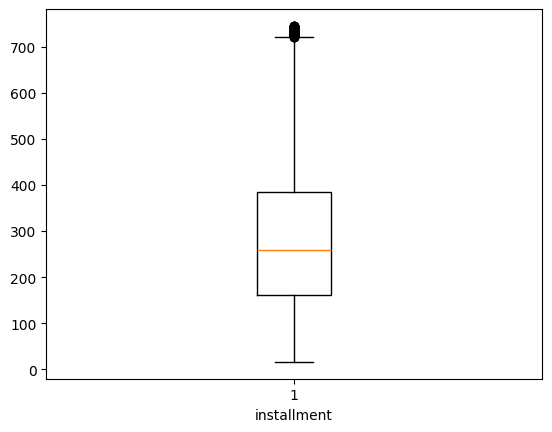

In [47]:
#Let's again plot the box plot after removing the outliers
numeric_columns = ['annual_inc','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment']

for cols in numeric_columns:
    plt.boxplot(loan_dataframe[cols])
    plt.xlabel(cols)
    plt.show()

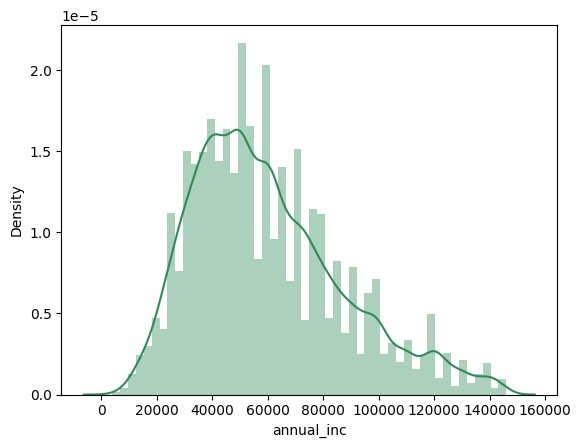

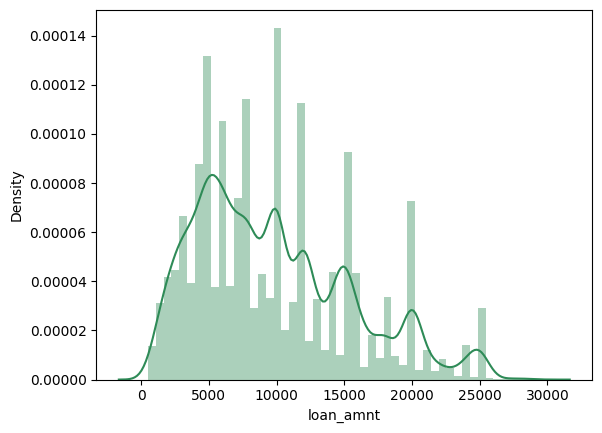

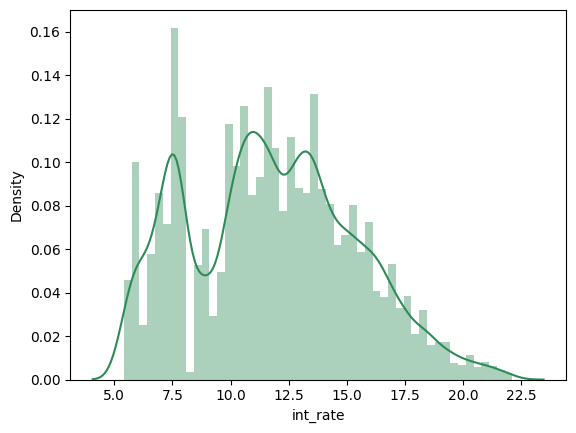

In [47]:
#Distribution plot for numerical columns without outliers
cols_lst= ["annual_inc","loan_amnt","int_rate"]

for cols in cols_lst:
    sbn.distplot(loan_dataframe[cols],color='seagreen')
    plt.show()

In [48]:
#Lets look at the statistical summary of the column annual_inc
loan_dataframe.annual_inc.describe()

count     33193.000000
mean      60167.254229
std       27392.575296
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      145992.000000
Name: annual_inc, dtype: float64

**Observations on 'annual_inc' field:**
<span style='background:yellow'> The Annual income of most if applicants lies between 40k-75k  </span>

In [49]:
#Lets look at the statistical summary of the column loan_amnt
loan_dataframe.loan_amnt.describe()

count    33193.000000
mean      9771.728226
std       5748.814573
min        500.000000
25%       5000.000000
50%       8875.000000
75%      13600.000000
max      29500.000000
Name: loan_amnt, dtype: float64

**Observations on 'loan_amnt' field:**
<span style='background:yellow'> Most of the loan amount applied was in the range of 5k-14k and Actual Max Loan amount applied was ~27k. </span>

In [50]:
#Lets look at the statistical summary of the column int_rate
loan_dataframe.int_rate.describe() 

count    33193.000000
mean        11.773443
std          3.586094
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

**Observations on 'int_rate' field:**
<span style='background:yellow'>Majority of the applicant's ROI is in the range of 9-14 percent.And avg roi is 11.7 percent </span>

### E.2 Univariate Analysis - Unordered Categorical Variable 

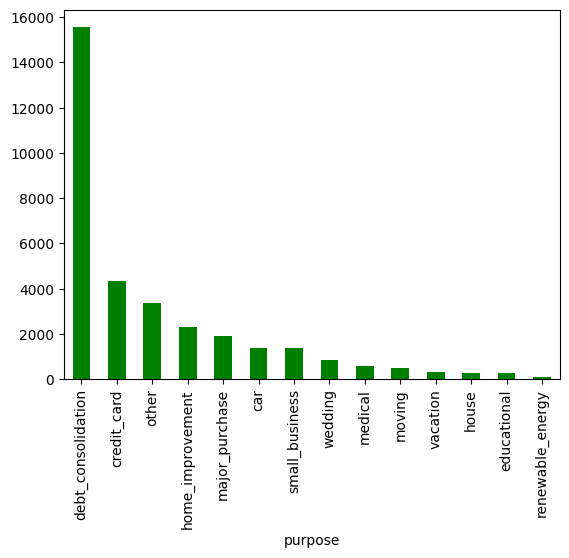

In [51]:
#Bar plot of column 'purpose'
loan_dataframe['purpose'].value_counts().plot.bar(color= ['green'])
plt.show()

**Observations on 'purpose' column:**
<span style='background:yellow'>Most of the loan applicants are for debt_consolidations. </span>

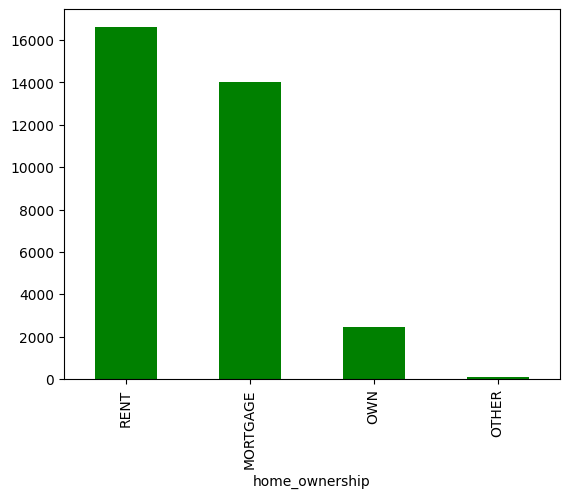

In [52]:
#Bar plot of column 'home_ownership'
loan_dataframe["home_ownership"].value_counts().plot.bar(color= ['green'])

plt.show() 

**Observations on 'home_ownership' column:**
<span style='background:yellow'>Maximum of loan applicants are either living on Rent or on Mortgage </span>

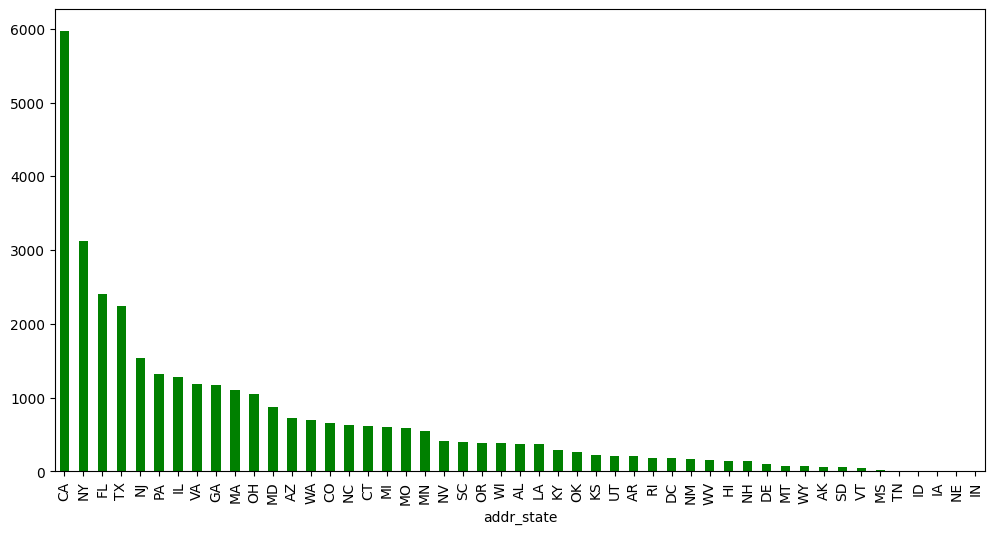

In [53]:
#Bar plot of column 'addr_state'
plt.figure(figsize=(12,6))
loan_dataframe['addr_state'].value_counts().plot.bar(color= ['green'])
plt.show()

**Observations on 'addr_state' column:**
<span style='background:yellow'> Majority of the Loan applicants are from CA(State) </span>

### E.3 Univariate Analysis-Ordered Categorical Variable

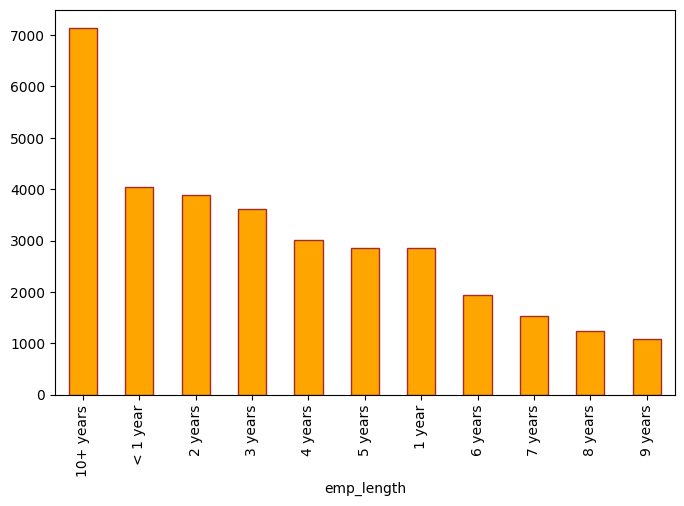

In [54]:
#Plotting bar plot for emp_length column
plt.figure(figsize=(8,5))
loan_dataframe['emp_length'].value_counts().plot.bar(color= ['orange'],edgecolor = 'brown')
plt.show()

**Observations on 'emp_length' column:**
<span style='background:yellow'>Most of the applications are having 10+ yrs of Exp </span>

## F.Segmented Univariate Analysis

### F.1 On loan_amnt column

#### F.1.1 Plotting the 'loan_amnt' across the 'verification_status' and 'home_ownership'

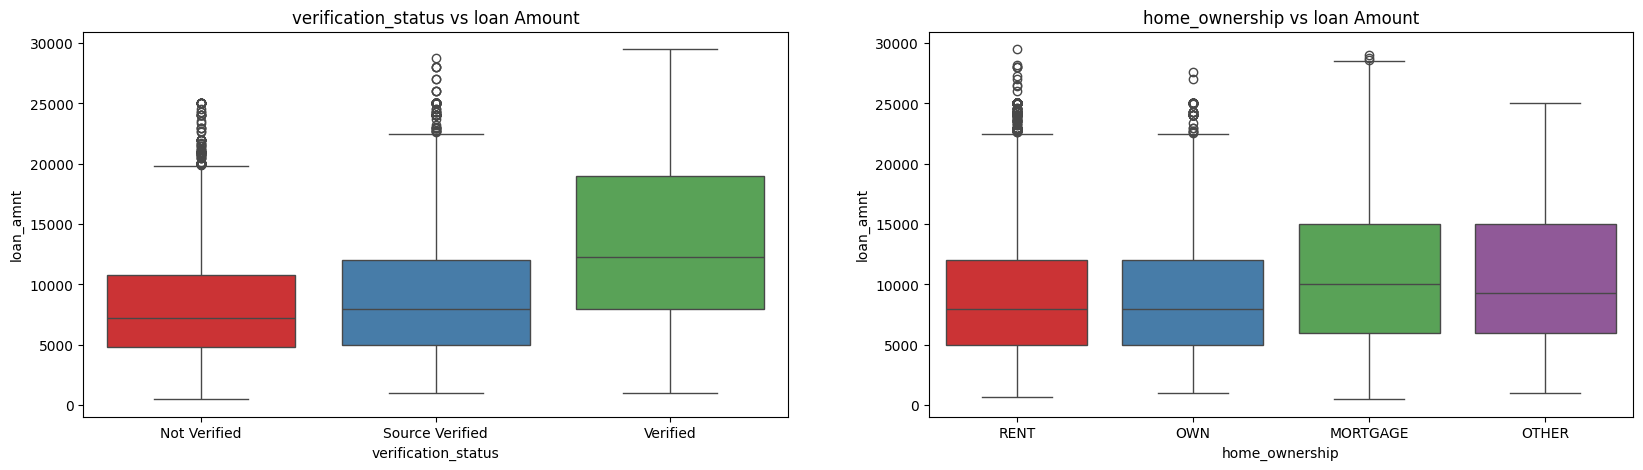

In [55]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.title('verification_status vs loan Amount')
verification_status_ord = loan_dataframe.verification_status.unique()
verification_status_ord.sort()
sbn.boxplot(x='verification_status', y=loan_dataframe.loan_amnt, order = verification_status_ord, data=loan_dataframe, palette="Set1")

plt.subplot(122)
sbn.boxplot(x='home_ownership', y=loan_dataframe.loan_amnt, data=loan_dataframe, palette="Set1")
plt.title('home_ownership vs loan Amount')

plt.show()

**Observations on 'home_ownership' and verification_status fields:**
<span style='background:yellow'></br>
Borrowers who are verified, applied higher amount of loan.</br>
Borrowers who belong to 'MORTGAGE' have the higher loan amount.</br>
But interestingly 'OTHER' sub_category also has higher loan amount which means the borrowers belonging to this sub-category did not disclose their home_ownership status. This could be a potential risk factor.
</span>

In [56]:
#Getting the different category of verification status and its counts
loan_dataframe.verification_status.value_counts()

verification_status
Not Verified       15036
Verified            9366
Source Verified     8791
Name: count, dtype: int64

In [57]:
#Getting the percentage of loan applicants in the 'Not Verified' category
print("Percentage of 'Not verified' loan applications =", round(15010/len(loan_dataframe)*100,2),"%")

Percentage of 'Not verified' loan applications = 45.22 %


**Observations on 'verification_status' column:**
<span style='background:yellow'></br>
Looks like the percentage of 'Not Verified' loan applications is high.</br>
As not verified applications could be risky,  the verification process can be tighter while approving the loan to reduce the same.
</span>

#### F.1.2 Plotting the 'loan_amnt' across the 'Terms' and 'Grade'

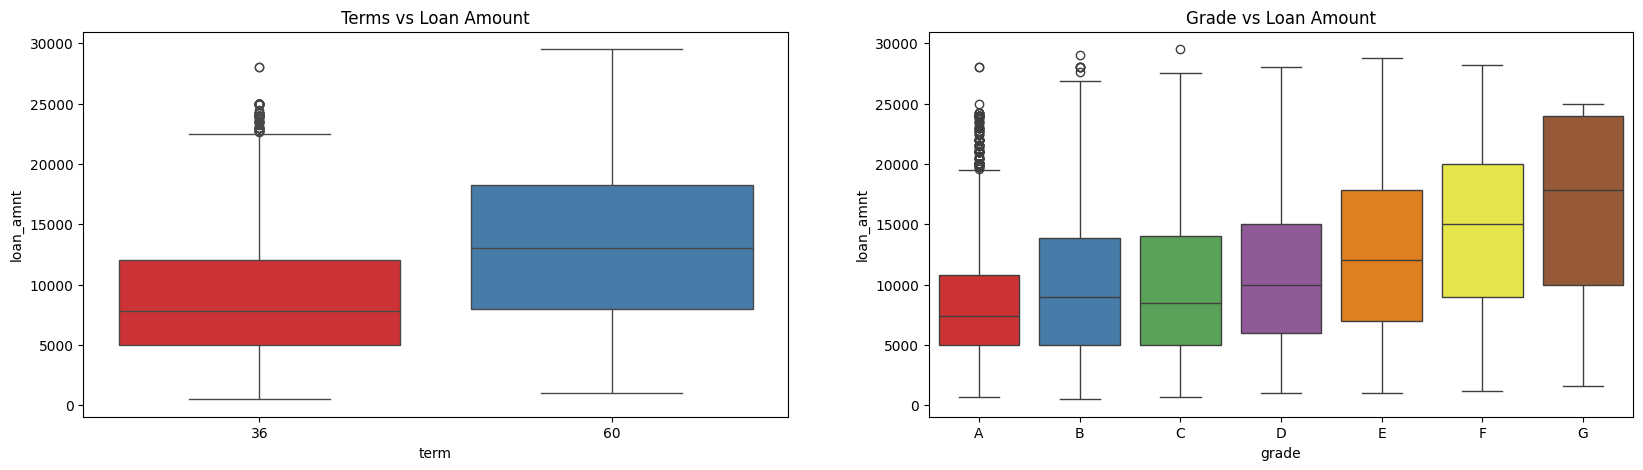

In [58]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sbn.boxplot(x='term', y=loan_dataframe.loan_amnt, data=loan_dataframe, palette="Set1")
plt.title('Terms vs Loan Amount')

plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ordered = loan_dataframe.grade.unique()
grade_ordered.sort()
sbn.boxplot(x='grade', y=loan_dataframe.loan_amnt, order = grade_ordered, data=loan_dataframe, palette="Set1")

plt.show()

-  **Observations on 'Term' and Grade fields:**
<span style='background:yellow'></br>
Higher amount loans have high tenure i.e, 60 months.</br>
As the loan grade decreases from A to G, the corresponding loan amount increases.</br>
Most of the customers are prefering lower graded loan 'G' covering higher loan amount (denoted by spread of the boxplot)
</span>

#### F.1.3 Plotting 'loan_amnt' across 'loan_status'

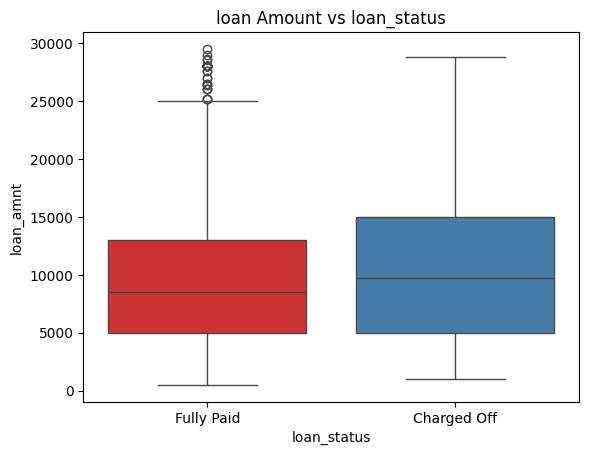

In [59]:
sbn.boxplot(x='loan_status', y=loan_dataframe.loan_amnt, data=loan_dataframe, palette="Set1")
plt.title('loan Amount vs loan_status')
plt.show()

**Observations on 'loan_status' field:**
<span style='background:yellow'> Loan applications with higher loan amounts high likely to get charged off.  </span>

#### F.1.4 Plotting 'loan_amnt' across 'emp_length'

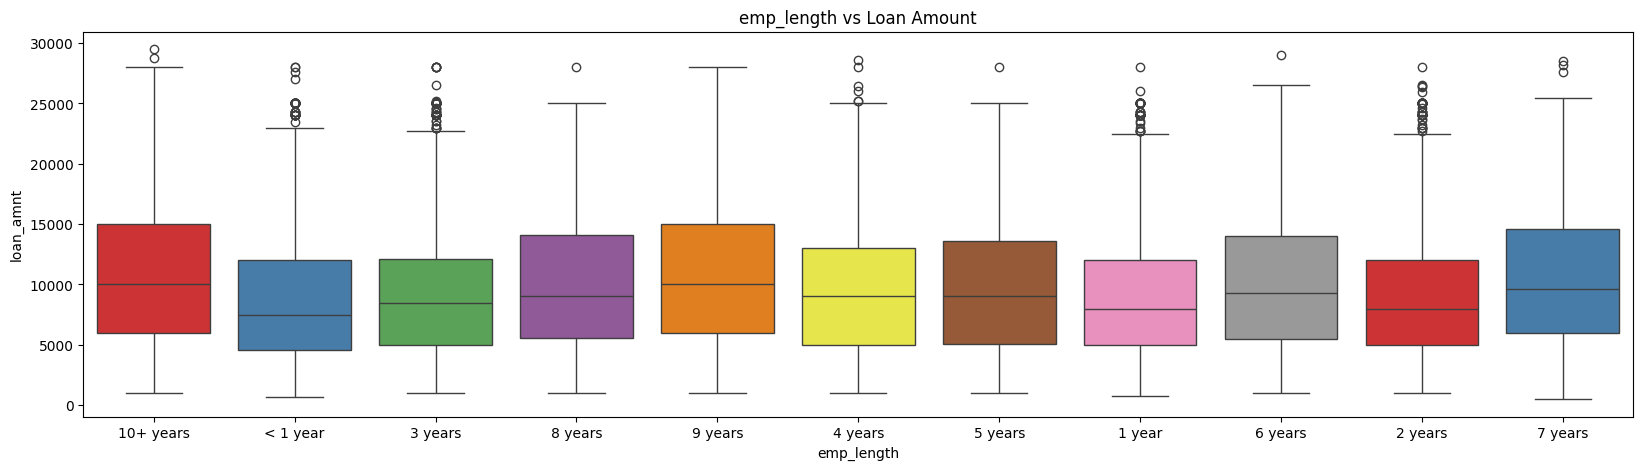

In [60]:
plt.figure(figsize=(20,5))
sbn.boxplot(x='emp_length', y=loan_dataframe.loan_amnt, data=loan_dataframe,palette="Set1")
plt.title('emp_length vs Loan Amount')
plt.show()

**Observations on 'emp_length' field:**
<span style='background:yellow'> The Heighest borrowers are from 10+ years category and  the least is <1 year </span>

#### F.1.5 Plotting 'loan_amnt' across 'purpose'

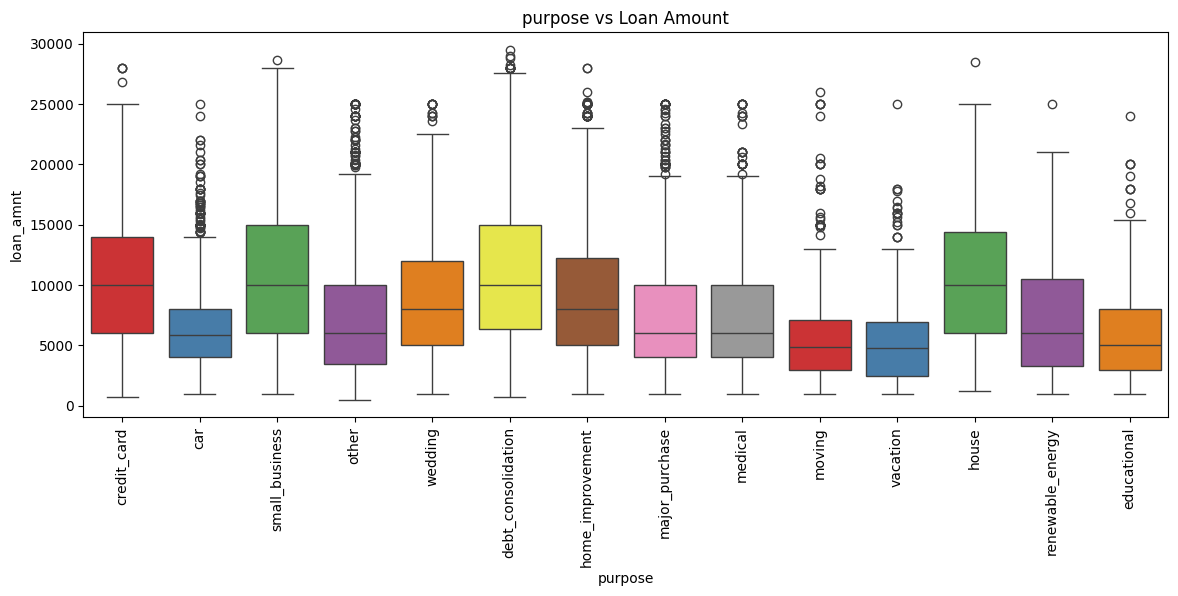

In [61]:
plt.figure(figsize=(14,5))
sbn.boxplot(x='purpose', y=loan_dataframe.loan_amnt, data=loan_dataframe,palette="Set1")
plt.title('purpose vs Loan Amount')
plt.xticks(rotation=90)
plt.show()

**Observations on 'purpose' field:**
<span style='background:yellow'>3 highest category of loan purpose are Small bussiness,debt consolidation and house.</span>

#### F.1.6 Plotting the 'loan_amnt' across the 'issue_yr' and 'issue_mon'

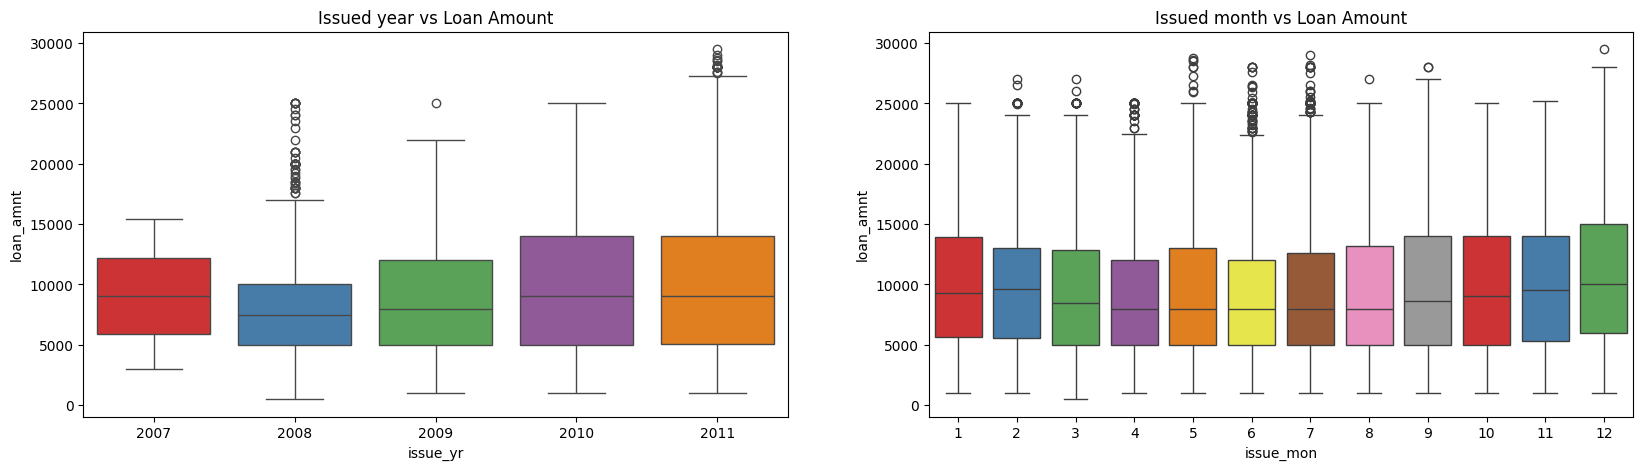

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.boxplot(x=loan_dataframe.issue_yr, y=loan_dataframe.loan_amnt, data=loan_dataframe,palette="Set1")
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sbn.boxplot(x=loan_dataframe.issue_mon, y=loan_dataframe.loan_amnt, data=loan_dataframe,palette="Set1")
plt.title('Issued month vs Loan Amount')
plt.show()

**Observations on 'Issue year and issue month' field:**</br>
<span style='background:yellow'> Loan amount increased from 2007 to 2011 except for the year 2008 which may be due to the economy crisis </span></br>
<span style='background:yellow'> There is a slight increase in the loan amount during the months of December and January. Could be due to the festive season in USA (Christmas Eve,The Black Friday Sale and New Year )</span>

#### F.1.7 Plotting Funded Amount vs loan amount

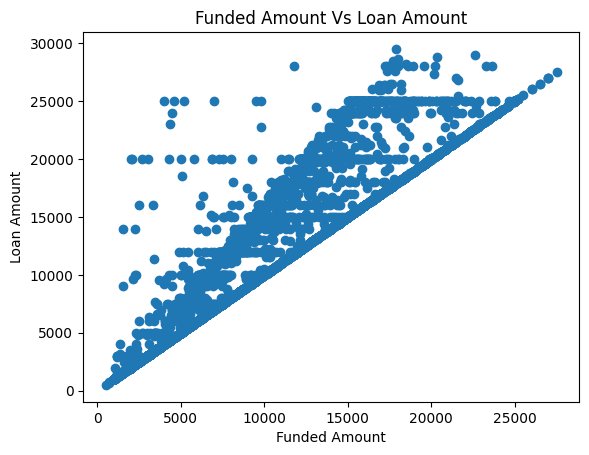

In [63]:
#Finding relationship between 'loan_amnt' and 'funded_amnt'

plt.scatter(loan_dataframe.funded_amnt, loan_dataframe.loan_amnt)
plt.title("Funded Amount Vs Loan Amount")
plt.xlabel("Funded Amount")
plt.ylabel("Loan Amount")
plt.show()

**Observations on 'Funded Amount' field:**</br>
<span style='background:yellow'> The scatter plot between 'funded_amnt' and 'loan_amnt' denotes a linear relationship between the two</span></br>
<span style='background:yellow'>So, likewise we did for the loan_amnt across the columns, we can conclude that the Segmented Univariate Analysis of 'funded_amnt' across ('term', 'grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'emp_length', 'issue_year' and 'issue_month') columns will be more or less similar.</span></br>

### F.2 On int_rate column

#### F.2.1 Plotting the 'int_rate' across the 'grade' and 'term'

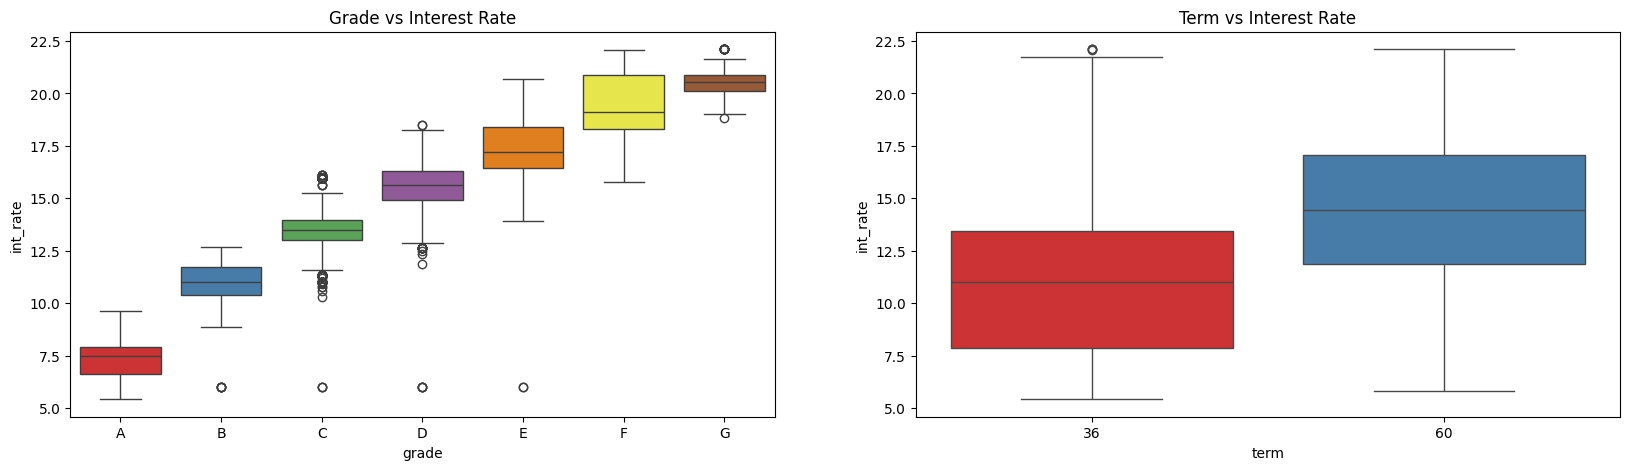

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Grade vs Interest Rate')
grade_ord = loan_dataframe.grade.unique()
grade_ord.sort()
sbn.boxplot(x='grade', y=loan_dataframe.int_rate, order = grade_ord, data=loan_dataframe,palette="Set1")

plt.subplot(122)
sbn.boxplot(x='term', y=loan_dataframe.int_rate, data=loan_dataframe,palette="Set1")
plt.title('Term vs Interest Rate')
plt.show()

**Observations on 'grade' and term field:**</br>
<span style='background:yellow'> Interest Rates are Higher as Grades are Lowering (A >> G).  </span></br>
<span style='background:yellow'> Higher tenure loans (60 months) have higher interest rates.  </span>

#### F.2.2 Plotting 'int_rate' across 'loan_status'

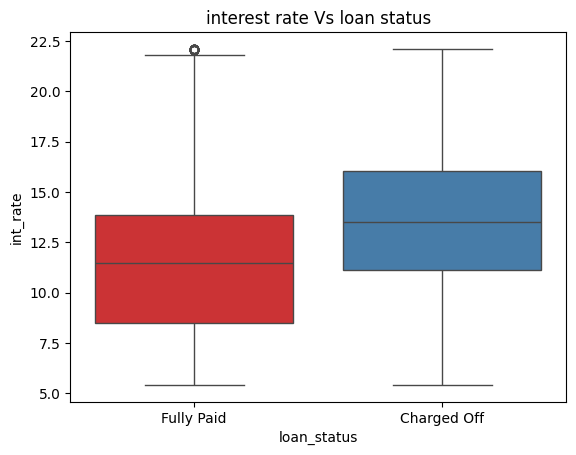

In [65]:
sbn.boxplot(x='loan_status', y=loan_dataframe.int_rate, data=loan_dataframe,palette="Set1")
plt.title('interest rate Vs loan status')
plt.show()

**Observations on 'loan_status':**</br>
<span style='background:yellow'> Obvious observation is greater the interest rate more the chances of defaulting the loan  </span>

#### F.2.3 Plotting the 'int_rate' across the 'verification_status' and 'home_ownership'

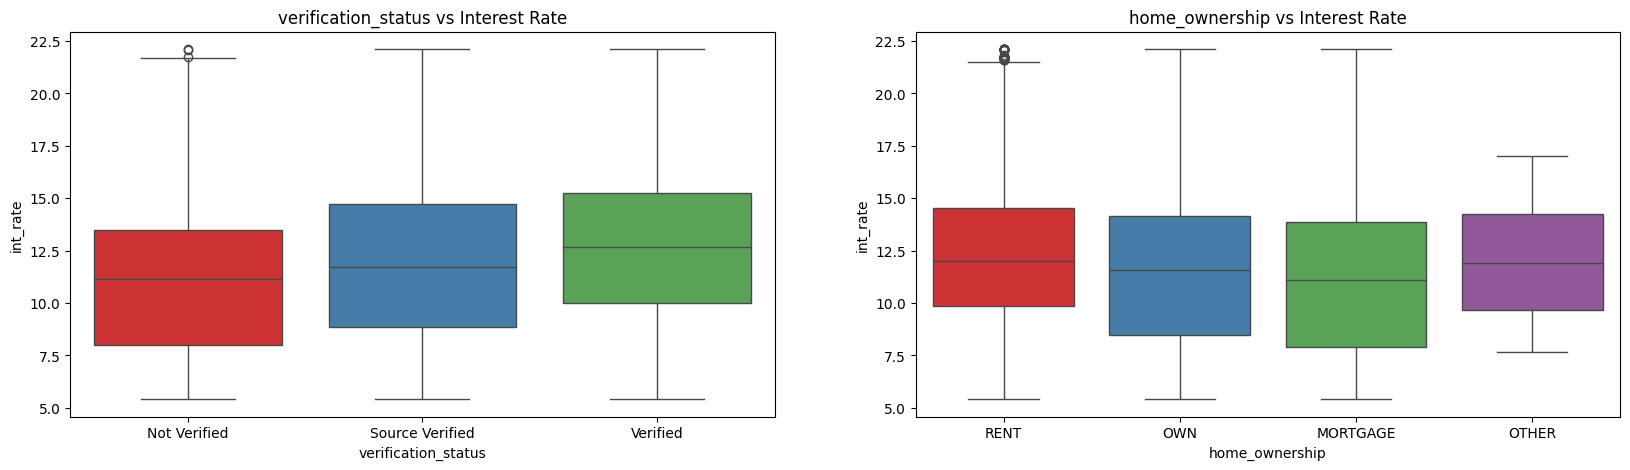

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('verification_status vs Interest Rate')
verification_status_ord = loan_dataframe.verification_status.unique()
verification_status_ord.sort()
sbn.boxplot(x='verification_status', y=loan_dataframe.int_rate, order = verification_status_ord, data=loan_dataframe,palette="Set1")

plt.subplot(122)
sbn.boxplot(x='home_ownership', y=loan_dataframe.int_rate, data=loan_dataframe,palette="Set1")
plt.title('home_ownership vs Interest Rate')

plt.show()

**Observations on 'verification_status' and home_ownership fields:**</br>
<span style='background:yellow'> Intest rates of the Non Verified Borrowers compared to Verified and Source Verified borrowers is high which is surprising and questionable </span></br>
<span style='background:yellow'> Home_ownership status as 'OWN' and 'MORTGAGE' got loans with less interest rates  may be due to borrer security </span>

#### F.2.4 Plotting 'int_rate' across 'purpose'

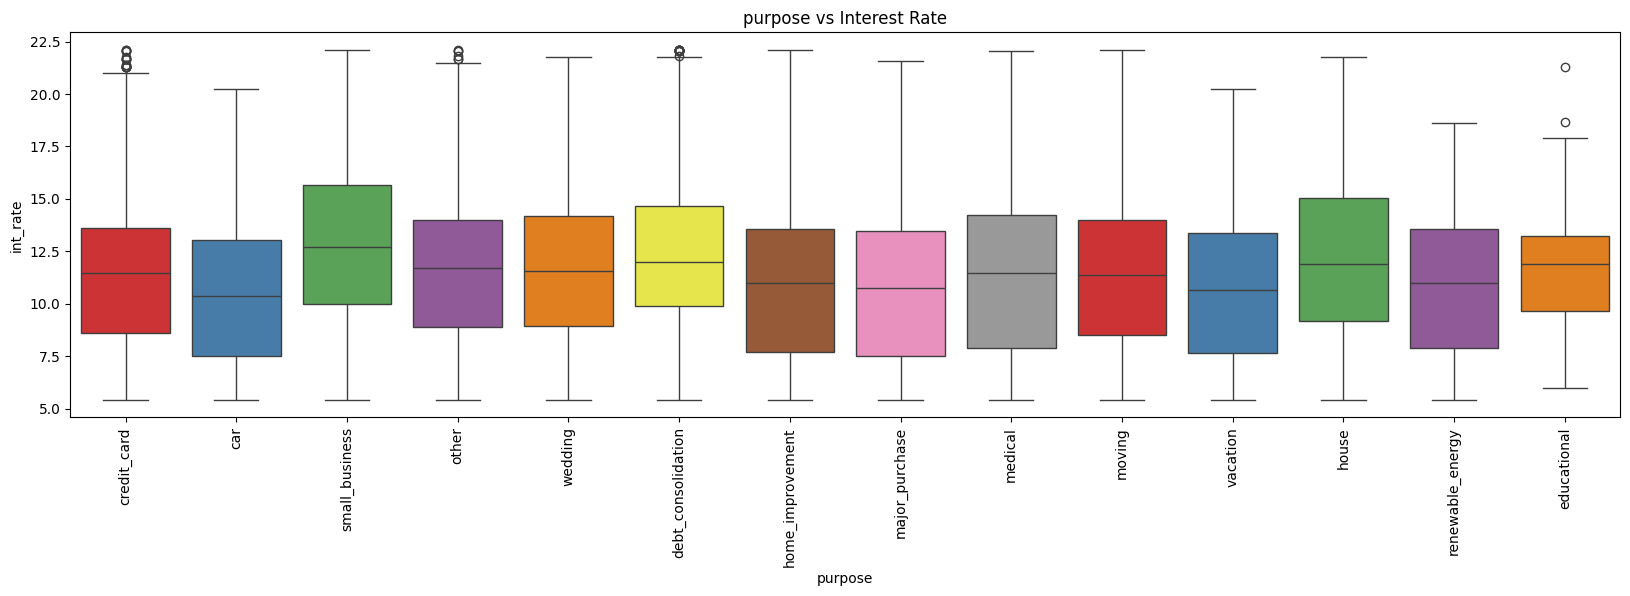

In [67]:
plt.figure(figsize=(20,5))
sbn.boxplot(x='purpose', y=loan_dataframe.int_rate, data=loan_dataframe,palette="Set1")
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')
plt.show()

**Observations on 'purpose' field:**</br>
<span style='background:yellow'> Debt Consolidation, House loans and Small Business are charged with higher interest rates </span>

#### F.2.5 Comparing 'int_rate' across 'emp_length'

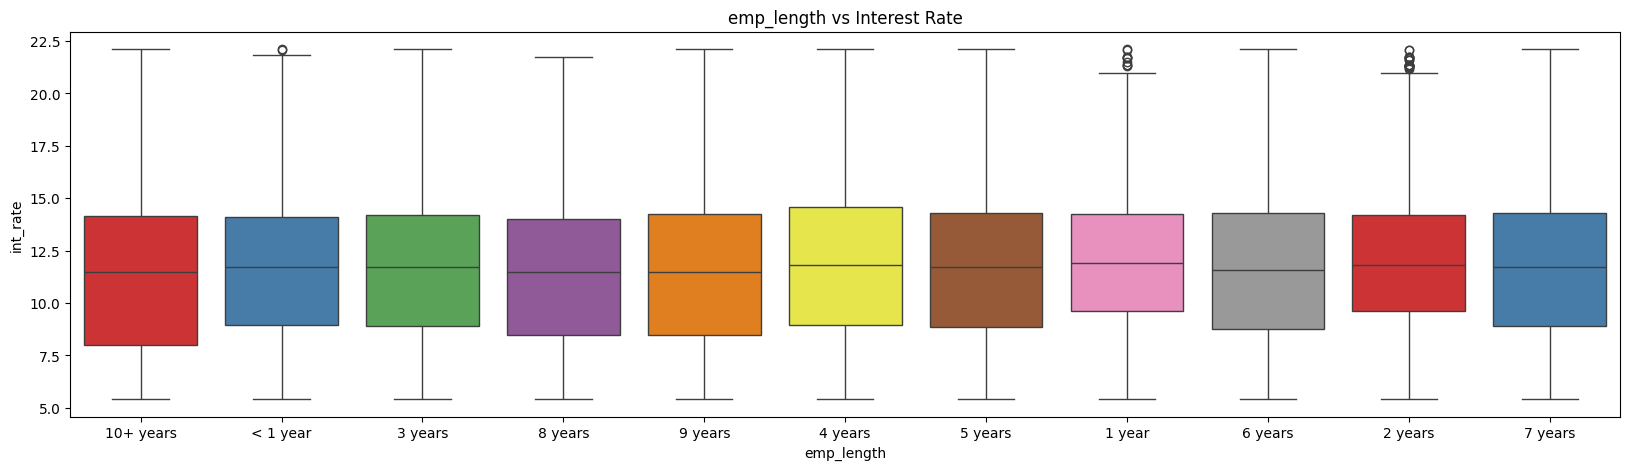

In [68]:
plt.figure(figsize=(20,5))
sbn.boxplot(x='emp_length', y=loan_dataframe.int_rate, data=loan_dataframe,palette="Set1")
plt.title('emp_length vs Interest Rate')
plt.show()

**Observations on emp_length field:**</br>
<span style='background:yellow'> Not much to observe between Employment length and interest rate. </span>

#### F.2.6 PLotting the 'int_rate' across the 'issue_yr' and 'issue_mon'

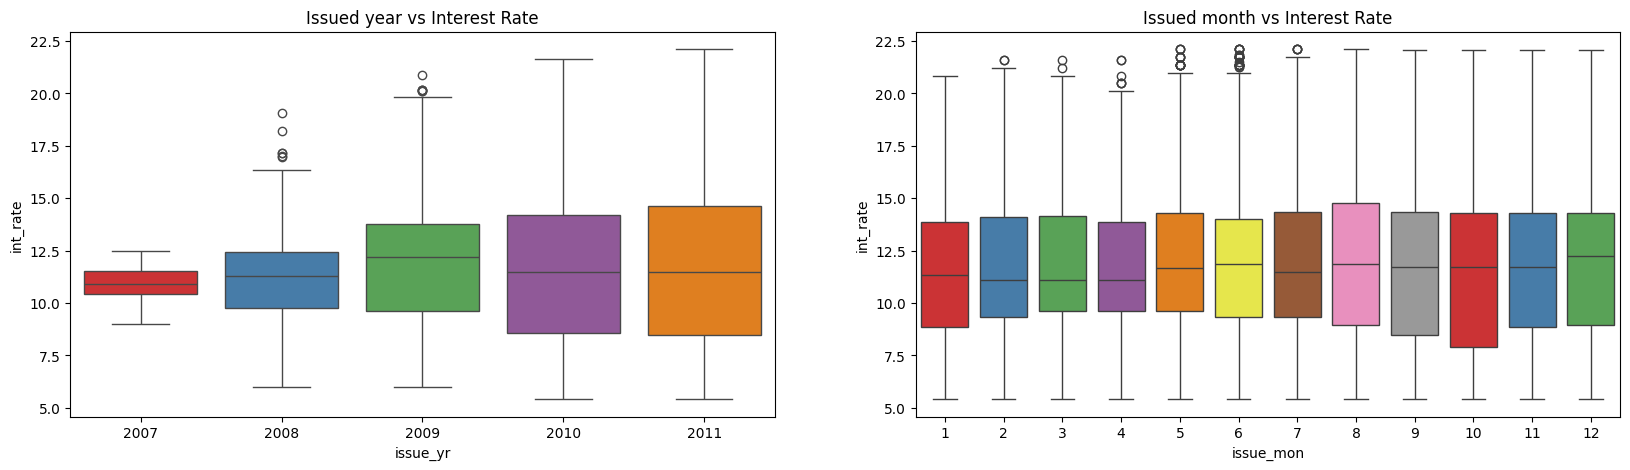

In [69]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.boxplot(x=loan_dataframe.issue_yr, y=loan_dataframe.int_rate, data=loan_dataframe,palette="Set1")
plt.title('Issued year vs Interest Rate')

plt.subplot(122)
sbn.boxplot(x=loan_dataframe.issue_mon, y=loan_dataframe.int_rate, data=loan_dataframe,palette="Set1")
plt.title('Issued month vs Interest Rate')
plt.show()

**Observations on 'grade' and term field:**</br>
<span style='background:yellow'> As the years of business passes by, the interest rates  getting more diversed may be due to evolve of different segments of loan business </span></br>

### F.3 On annual_inc column

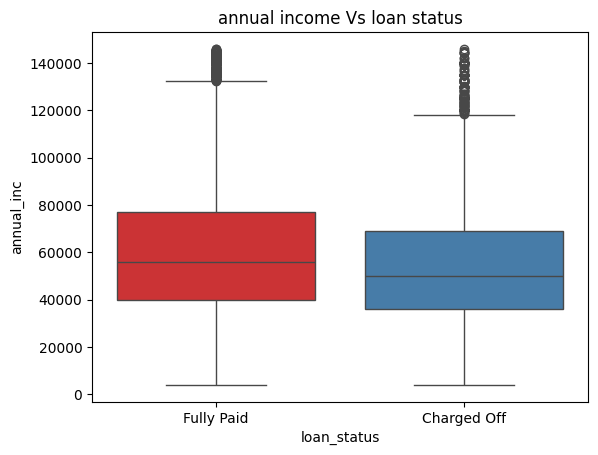

In [70]:
sbn.boxplot(x='loan_status', y=loan_dataframe.annual_inc, data=loan_dataframe,palette="Set1")
plt.title('annual income Vs loan status')
plt.show()

**Observations on 'loan_status' field:**</br>
<span style='background:yellow'> With Higher annual income borrower are more likely to fully pay the loan  </span> </br>
<span style='background:yellow'> Except loan status, others columns dont have impact on annual income  </span>

### F.4 On Dti Column

#### F.4.1 Plotting the 'dti' across the 'grade' and 'term'

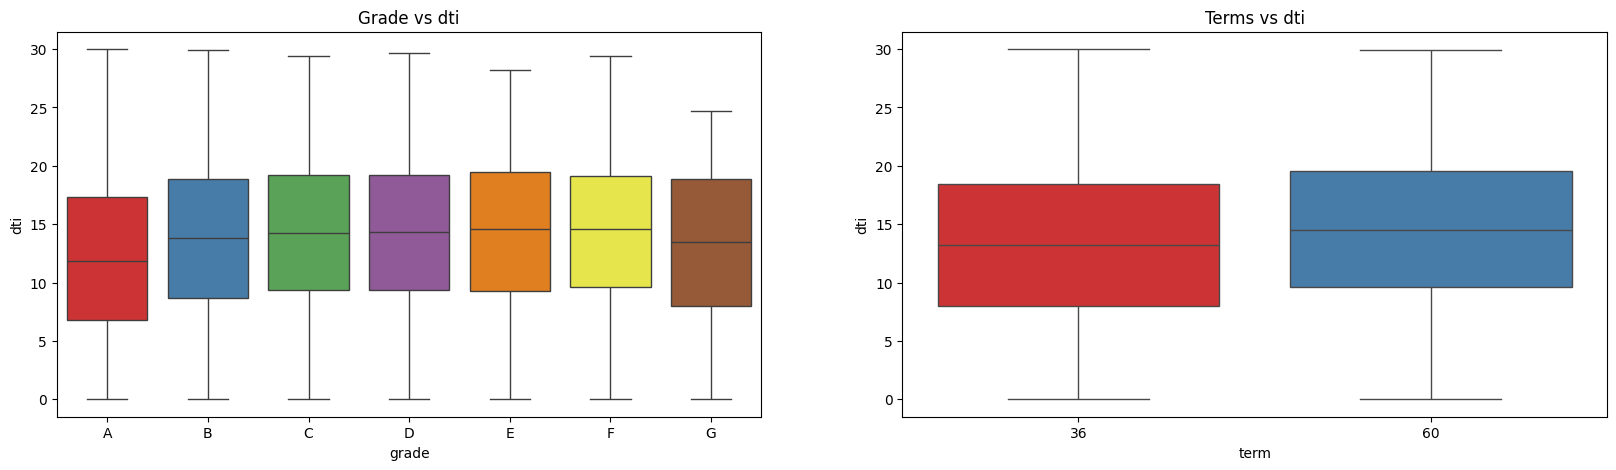

In [71]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.title('Grade vs dti')
grade_ord = loan_dataframe.grade.unique()
grade_ord.sort()
sbn.boxplot(x='grade', y=loan_dataframe.dti, order = grade_ord, data=loan_dataframe,palette="Set1")

plt.subplot(122)
sbn.boxplot(x='term', y=loan_dataframe.dti, data=loan_dataframe,palette="Set1")
plt.title('Terms vs dti')

plt.show()

**Observations on 'grade' and term field:**</br>
<span style='background:yellow'>Borrowers having lower dti are likely to get better grade loans from A to G </span></br>
<span style='background:yellow'>Borrowers having higher dti preferred longer tenure loans (60 months)  </span>

#### F.4.2 Plotting  the 'dti' across the 'purpose'

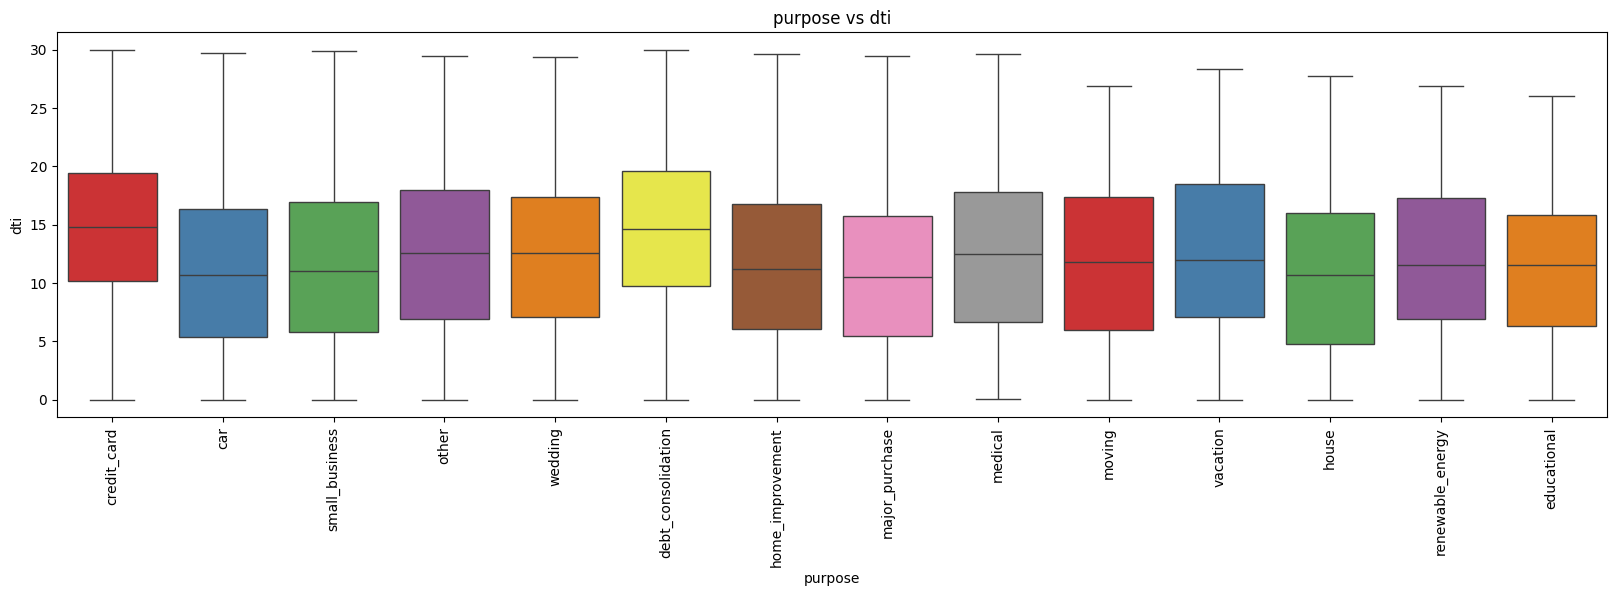

In [72]:
plt.figure(figsize=(20,5))
sbn.boxplot(x='purpose', y=loan_dataframe.dti, data=loan_dataframe,palette="Set1")
plt.xticks(rotation=90)
plt.title('purpose vs dti')
plt.show()

**Observations on 'purpose' field:**</br>
<span style='background:yellow'>Borrower who opted loan for 'credit_card' and 'debt_consolidation' purposes have more dti compared to other types.</span>

#### F.4.3 Plotting the 'dti' across the "loan_status"

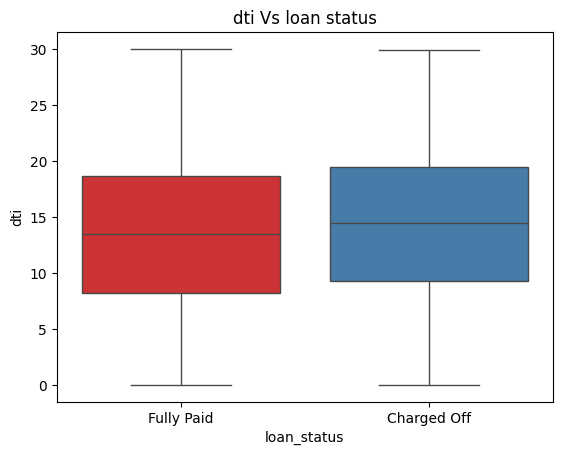

In [73]:
sbn.boxplot(x='loan_status', y=loan_dataframe.dti, data=loan_dataframe,palette="Set1")
plt.title('dti Vs loan status')
plt.show()

**Observations on 'loan_status' field:**</br>
<span style='background:yellow'>Borrowers with higher dti have more probability to default the loan</span>

## G.Bivariate Analysis (Categorical vs Numerical)

### G.1 On 'term' column

#### G1.1 Plotting term vs loan staus

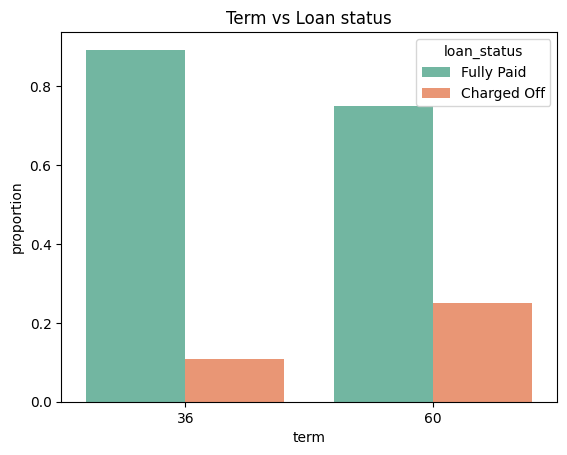

In [74]:
#Proportion of values for each category
df = loan_dataframe.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term')['id'].transform(lambda x: x/x.sum())
sbn.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'],palette= 'Set2')

plt.title('Term vs Loan status')
plt.show()

**Observations on 'term field':**</br>
<span style='background:yellow'> More proportion of borrowers defaulted loan in 60 months term compared to 36 months term. </span></br>
<span style='background:yellow'>Fully Paid proportion is higher in case of 36 months term. </span>

#### G.1.2 Plotting term vs loan amount

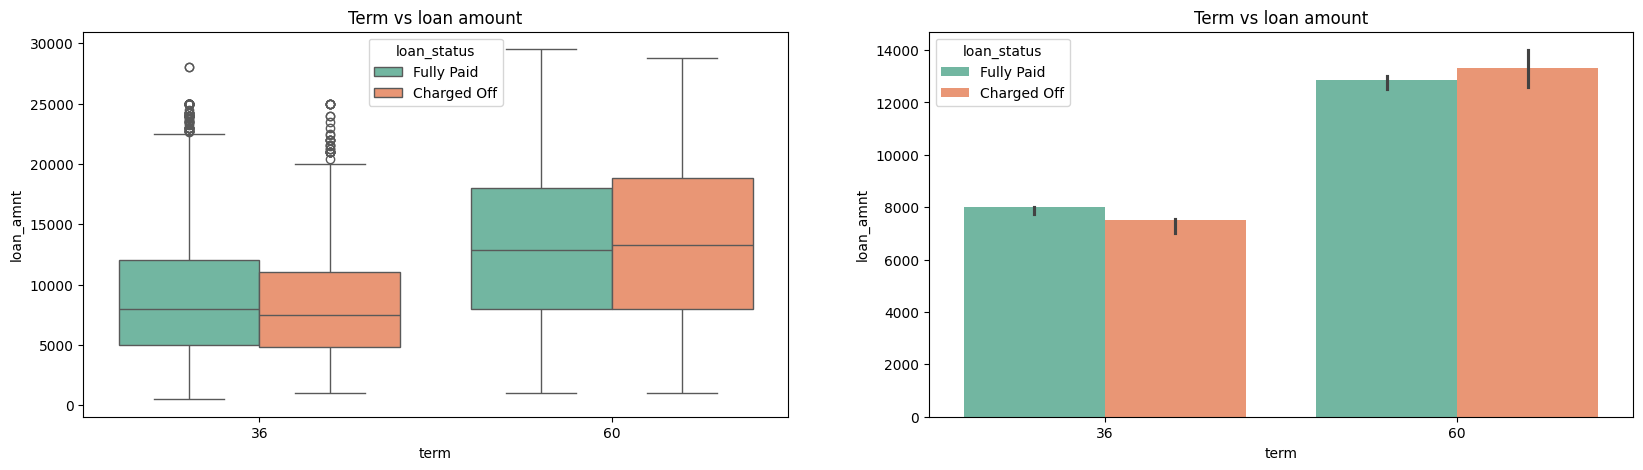

In [75]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan_dataframe,palette="Set2")
plt.title('Term vs loan amount')

plt.subplot(122)
sbn.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan_dataframe, estimator=np.median,palette="Set2")
plt.title('Term vs loan amount')
plt.show()

**Observations on 'grade' and term field:**</br>
<span style='background:yellow'>The spread of 'Fully Paid' and 'Charged off' are almost equal for both 36 months & 60 months tenure</span></br>
<span style='background:yellow'> Loan amount is not a deciding factor for defaults in both 36 and 60 months </span>

#### G.1.3 Plotting term vs intrest rate

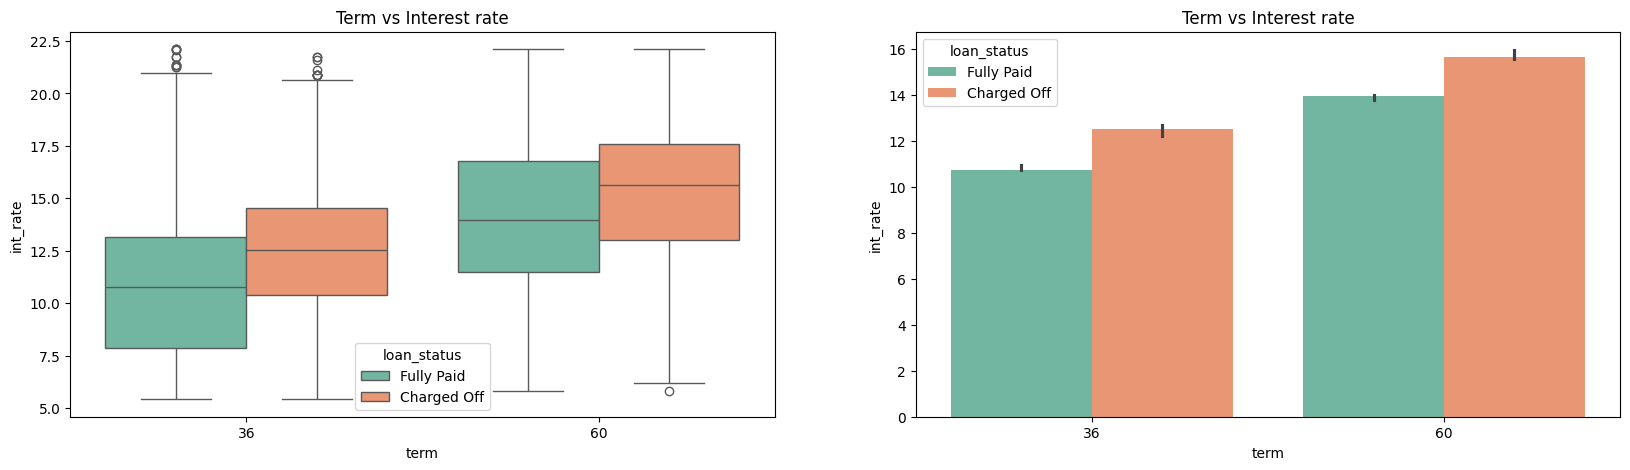

In [76]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.boxplot(x='term', y='int_rate', hue='loan_status', data=loan_dataframe,palette="Set2")
plt.title('Term vs Interest rate')

plt.subplot(122)
sbn.barplot(x='term', y='int_rate', hue='loan_status', data=loan_dataframe, estimator=np.median,palette="Set2")
plt.title('Term vs Interest rate')
plt.show()

**Observations on 'interest rate' field:**</br>
<span style='background:yellow'> For both 36 months & 60 months tenure, higher the interest rate, higher is the chance of getting defaulted</span>

#### G.1.4 Plotting term vs dti

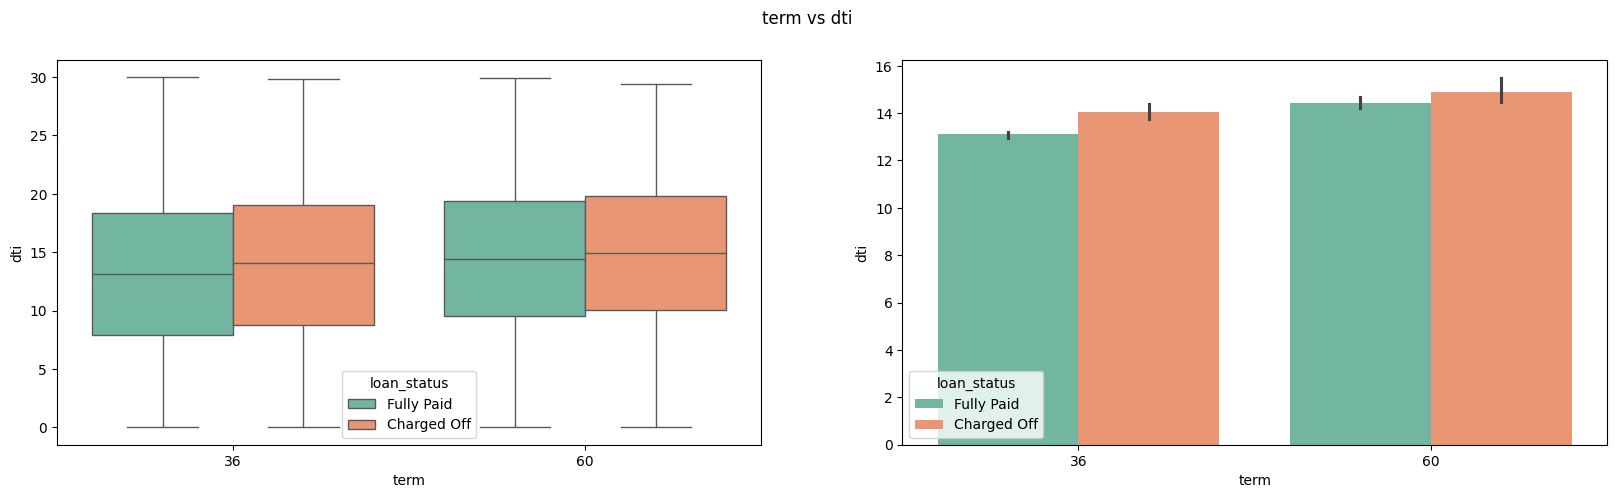

In [77]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.boxplot(x='term', y='dti', hue='loan_status', data=loan_dataframe,palette="Set2")
plt.suptitle('term vs dti')
plt.subplot(122)
sbn.barplot(x='term', y='dti', hue='loan_status', data=loan_dataframe, estimator=np.median,palette="Set2")
plt.suptitle('term vs dti')
plt.show()

**Observations on 'dti' field:**</br>
<span style='background:yellow'> WIth the dti increases, charged-off cases are comparatively higher than fully-paid cases, for both 36 months & 60 months tenure </span>


### G.2 On Grade column

In [78]:
#Sorting Grades from A to G for Graph purpose
grade_order = loan_dataframe.grade.unique()
grade_order.sort()
grade_order

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

#### G.2.1 Plotting grade Vs loan_status

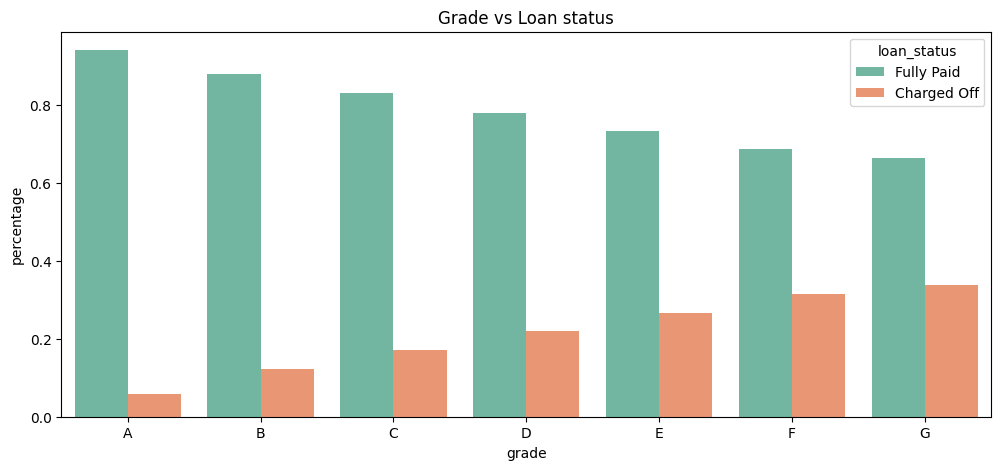

In [79]:
df_grade = loan_dataframe.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df_grade['percentage'] = df_grade.groupby('grade')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sbn.barplot(x='grade', y='percentage', hue='loan_status', data=df_grade, hue_order = ['Fully Paid', 'Charged Off'],palette="Set2")
plt.title('Grade vs Loan status')
plt.show()

**Observations on 'percentage'**</br>
<span style='background:yellow'> Interest Rates are Higher as Grades are Lowering (A to G).  </span></br>
<span style='background:yellow'> The interest rates are higher for Higher tenure loans (60 months).  </span>

#### G.2.2 Plotting grade Vs loan amt

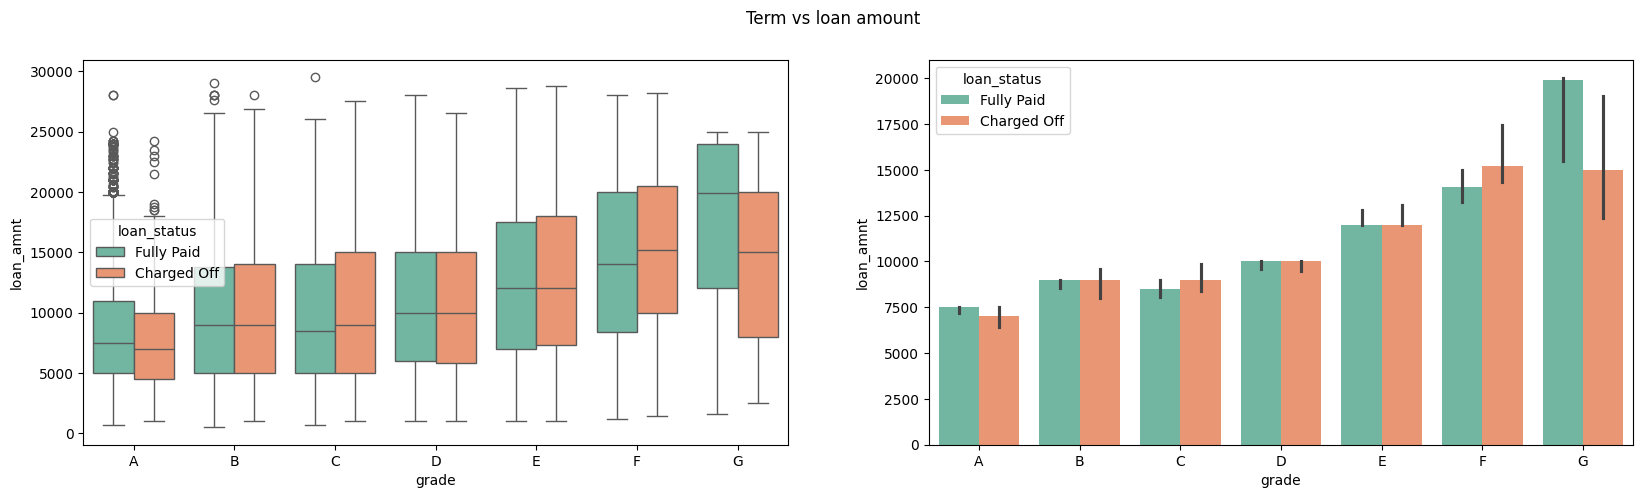

In [80]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_dataframe, order = grade_order,palette="Set2")

plt.subplot(122)
sbn.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_dataframe, estimator=np.median, order = grade_order,palette="Set2")
plt.suptitle('Term vs loan amount')
plt.show()

**Observations on 'loan amt' field:**</br>
<span style='background:yellow'>Borrowers opting for lower grade loans (e.g. F & G) with loan high amount are more likely to default more</span>

#### G.2.3 Plotting grade  vs int rate

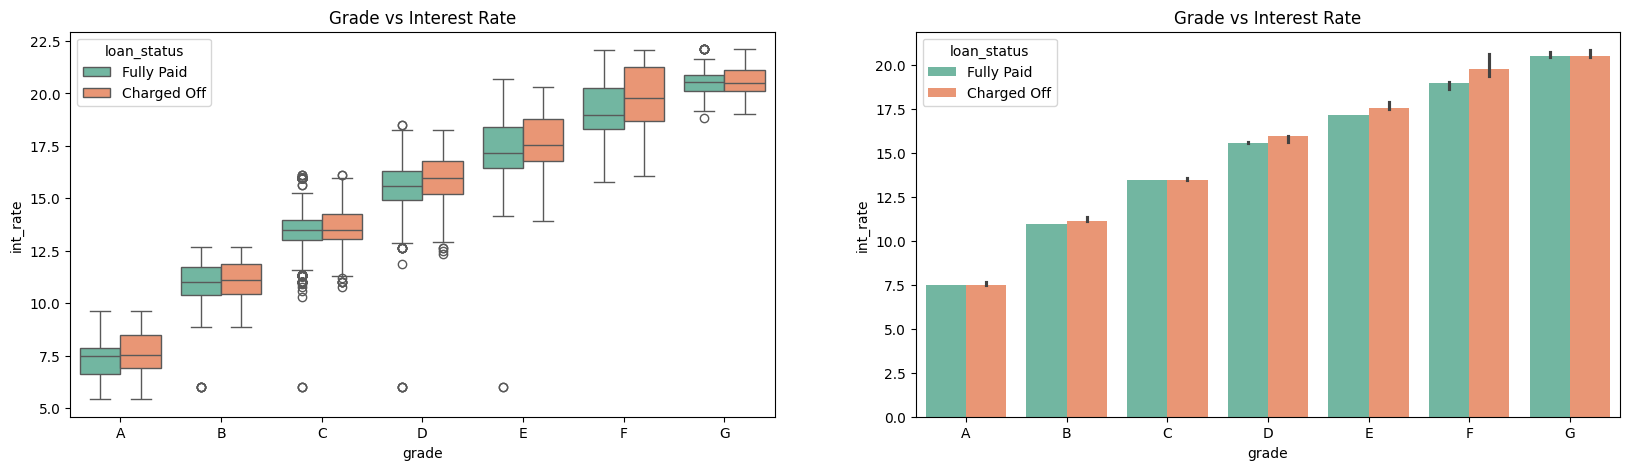

In [81]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan_dataframe, order = grade_order,palette="Set2")
plt.title('Grade vs Interest Rate')

plt.subplot(122)
sbn.barplot(x='grade', y='int_rate', hue='loan_status', data=loan_dataframe, order = grade_order, estimator=np.median,palette="Set2")
plt.title('Grade vs Interest Rate')
plt.show()

**Observations on 'int rate' field:**</br>
<span style='background:yellow'>With the decrease in grade leads to increase in interest rate, and the borrowers are more exposed to default the loan.</span>

### G.3 On emp_length column

#### G.3.1 Plotting emp_length vs loan_amt

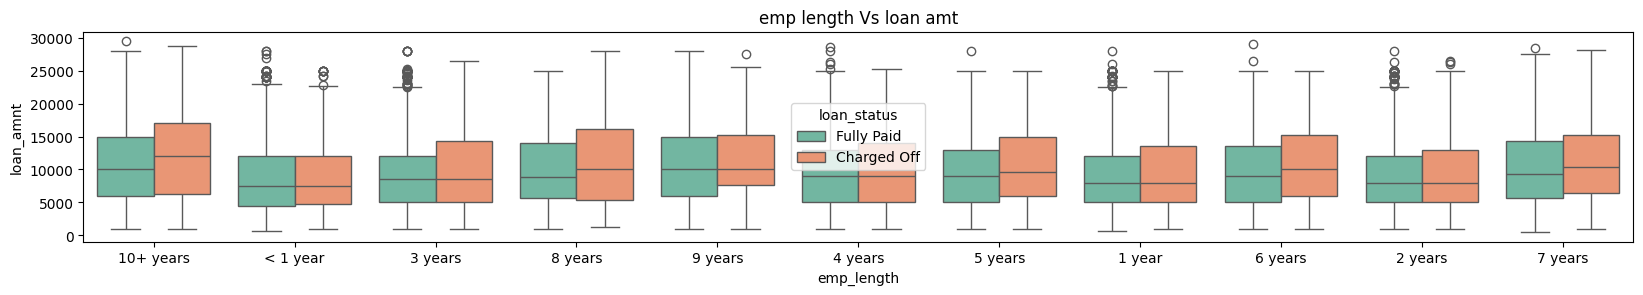

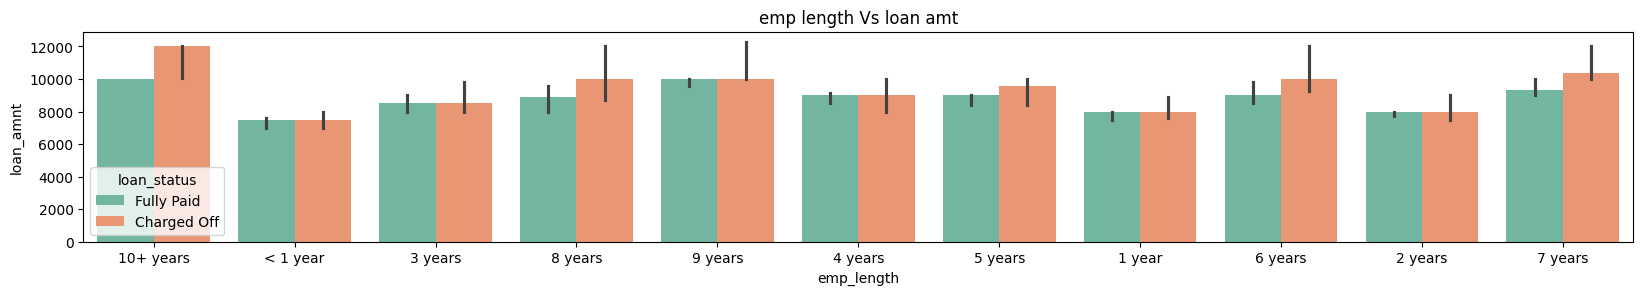

In [82]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sbn.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_dataframe,palette="Set2")
plt.title('emp length Vs loan amt')
plt.figure(figsize=(20,6))
plt.subplot(212)
sbn.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_dataframe, estimator=np.median,palette="Set2")
plt.title('emp length Vs loan amt')
plt.show()

**Observations on 'loan_amt' field:**</br>
<span style='background:yellow'> Borrowers with having employment lengths opted for more loan amounts and are more like to default.</span>

#### G.3.2 Plotting emp_length vs int_rate

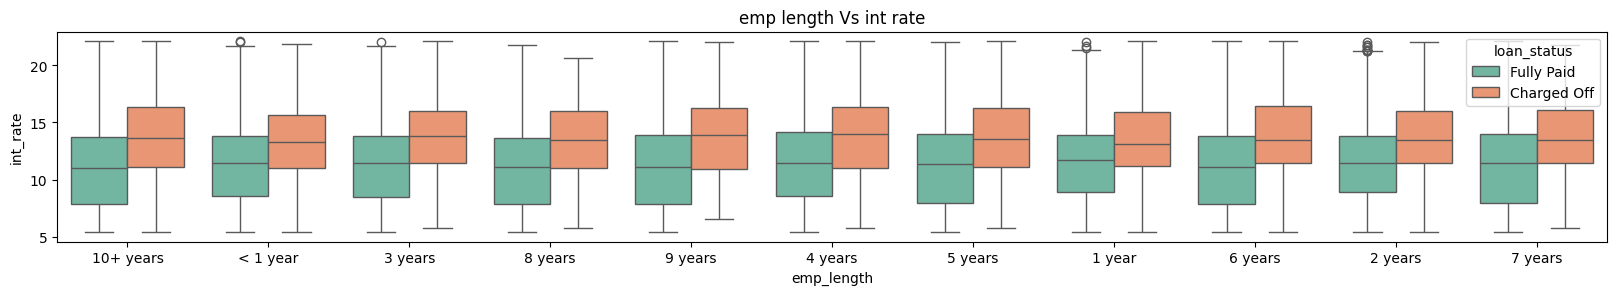

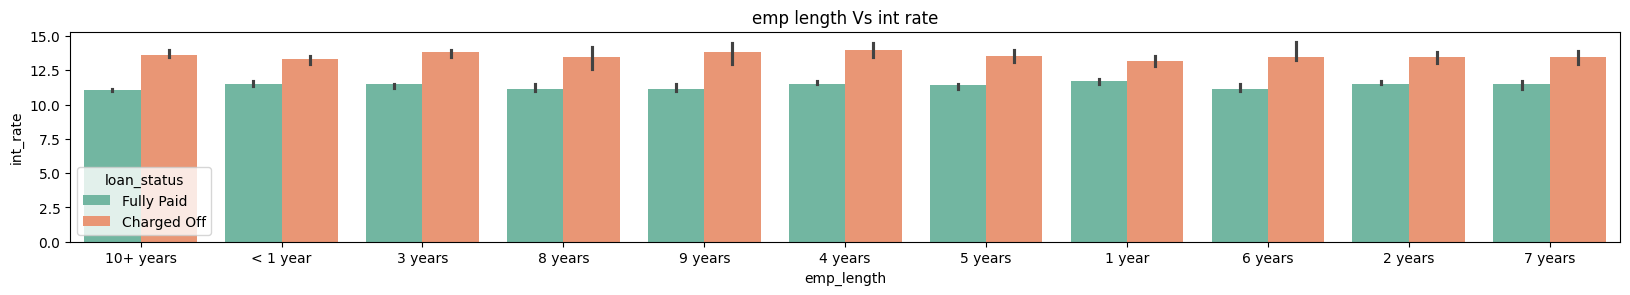

In [83]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sbn.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=loan_dataframe,palette="Set2")
plt.title('emp length Vs int rate')
plt.figure(figsize=(20,6))
plt.subplot(212)
sbn.barplot(x='emp_length', y='int_rate', hue='loan_status', data=loan_dataframe, estimator=np.median,palette="Set2")
plt.title('emp length Vs int rate')
plt.show()

**Observations on 'annual_inc' field:**</br>
<span style='background:yellow'>Irrespective of employment length, loans with more interest rate likely to be defaulted more.</span>

### G.4 On Home ownership column

#### G.4.1 Plottig home_ownership vs loan_status

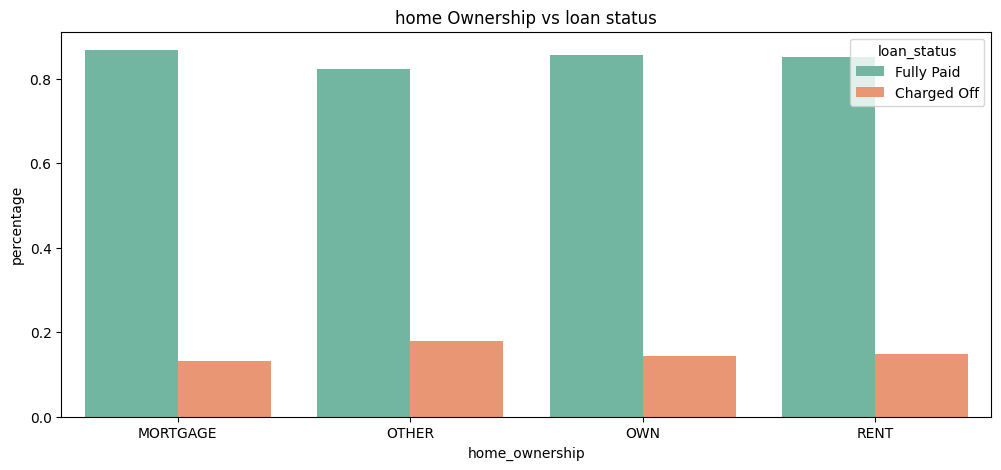

In [84]:
df = loan_dataframe.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sbn.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'],palette="Set2")
plt.title('home Ownership vs loan status')
plt.show()

**Observations on 'homeownership' field:**</br>
<span style='background:yellow'>A slightly high percentage of defaults being identified for 'OTHER' home ownership category.</span>

#### G.5.1 Plotting home_ownership vs int_rate

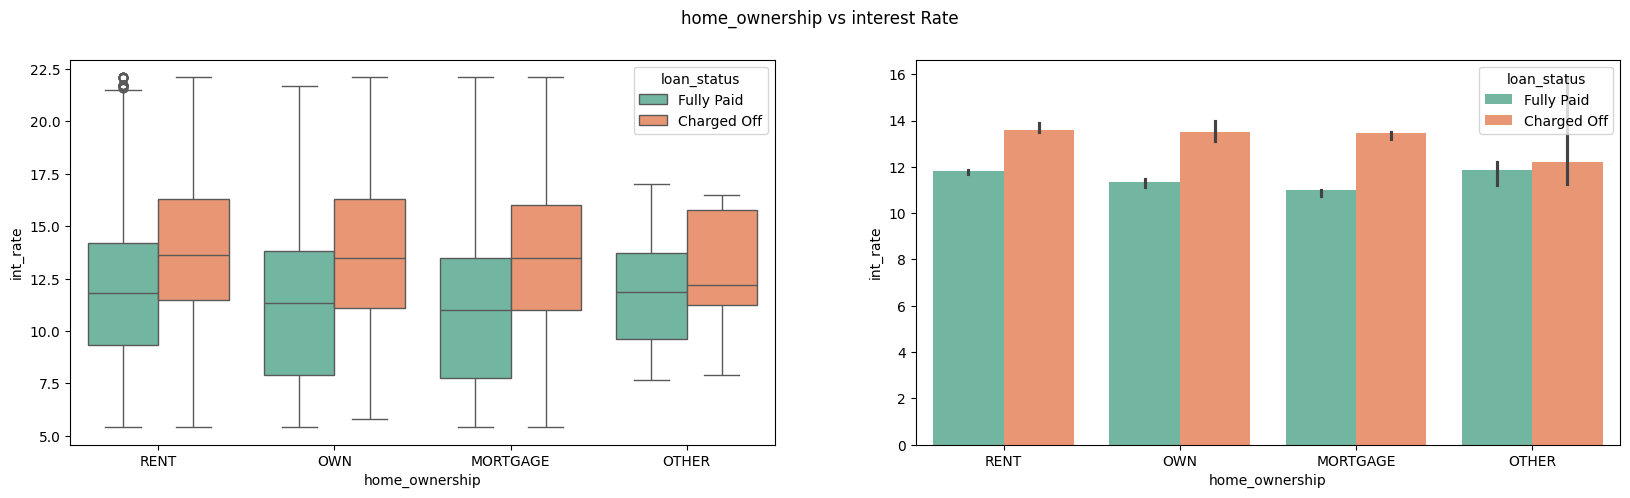

In [85]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_dataframe,palette="Set2")
plt.suptitle('home_ownership vs interest Rate')
plt.subplot(122)
sbn.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_dataframe, estimator=np.median,palette="Set2")
plt.suptitle('home_ownership vs interest Rate')
plt.show()

**Observations on 'int_Rate' field:**</br>
<span style='background:yellow'>Irrespective of home ownership criteria, the charged of rate is high when the interest rate is high</span>

#### G.5.2 Plotting home_ownership vs loan_amnt

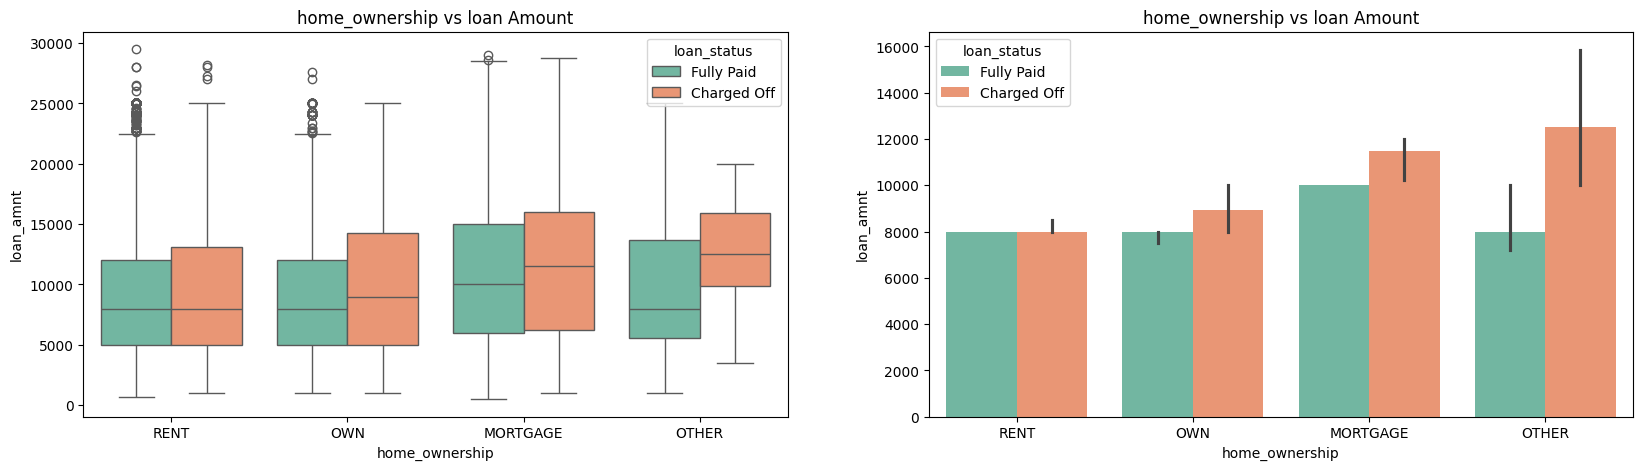

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_dataframe,palette="Set2")
plt.title('home_ownership vs loan Amount')

plt.subplot(122)
sbn.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_dataframe, estimator=np.median,palette="Set2")
plt.title('home_ownership vs loan Amount')
plt.show()

**Observations on 'loan_amt' field:**</br>
<span style='background:yellow'>Irrespective of home ownership criteria, higher the loan amount leads higher chances of default.</span>

#### G.5.3 Plotting home_ownership vs dti

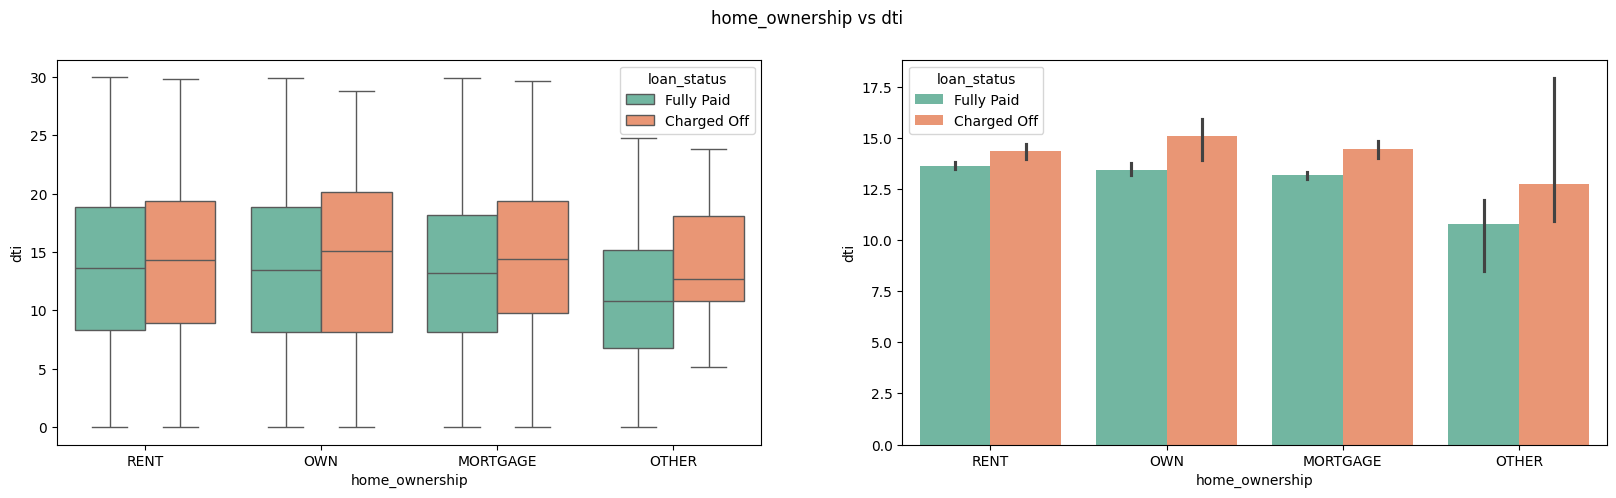

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.boxplot(x='home_ownership', y='dti', hue='loan_status', data=loan_dataframe,palette="Set2")
plt.suptitle('home_ownership vs dti')
plt.subplot(122)
sbn.barplot(x='home_ownership', y='dti', hue='loan_status', data=loan_dataframe, estimator=np.median,palette="Set2")
plt.suptitle('home_ownership vs dti')
plt.show()

**Observations on 'dti' field:**</br>
<span style='background:yellow'>'OTHER' home ownership category have less dti compared to other categories. and has less spread out of the fully paid and charged off </span>

### G.6 On Address State column

#### G.6.1 Plotting addr_state vs loan_status

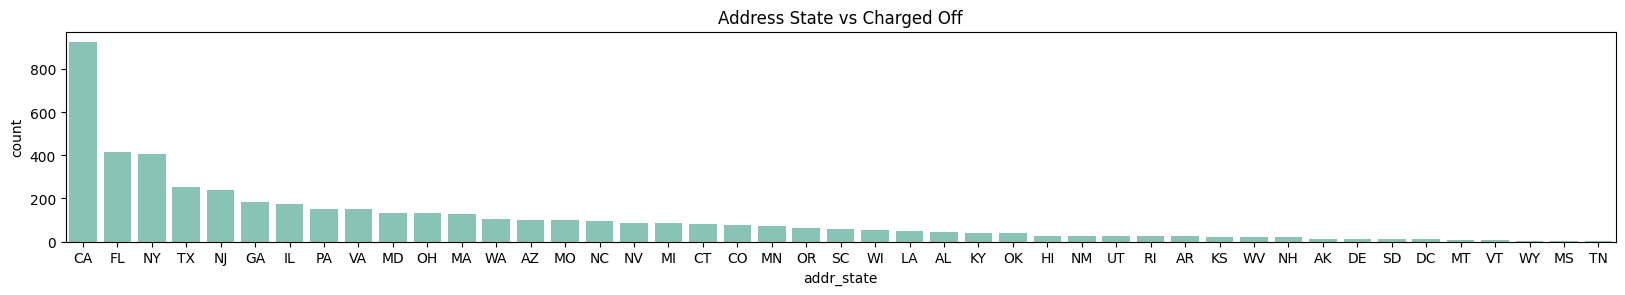

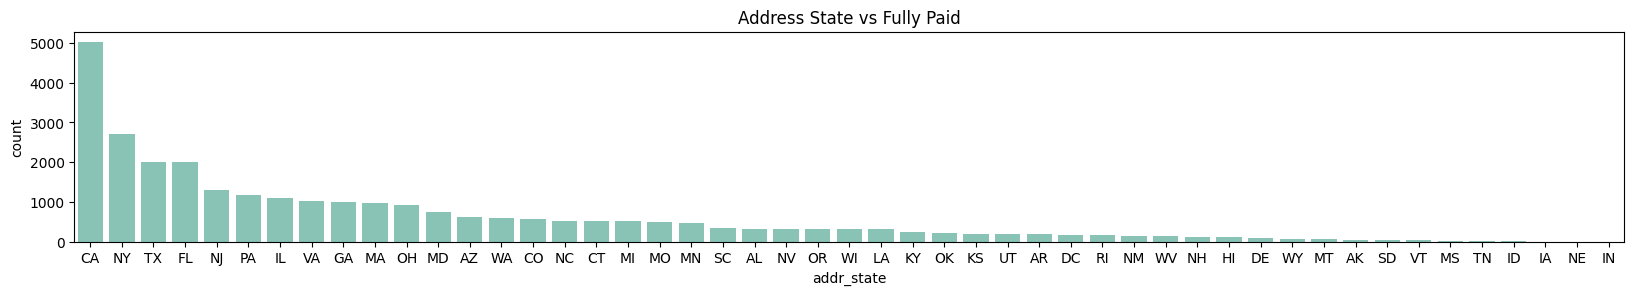

In [88]:
df_charged_off = loan_dataframe[loan_dataframe.loan_status == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sbn.countplot(x='addr_state', data=df_charged_off, order=df_charged_off.addr_state.value_counts().index,palette=["#7fcdbb"])
plt.title('Address State vs Charged Off')

df_fully_paid = loan_dataframe[loan_dataframe.loan_status == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sbn.countplot(x='addr_state', data=df_fully_paid, order=df_fully_paid.addr_state.value_counts().index,palette=["#7fcdbb"])
plt.title('Address State vs Fully Paid')
plt.show()

**Observations on 'address state vs loan status' field:**</br>
<span style='background:yellow'>Top 3 states where more borrowers defaulted are CA , FL and NY states</span>

### G.7 On Verification Status column

#### G.7.1 Plotting verification_status vs loan_amnt

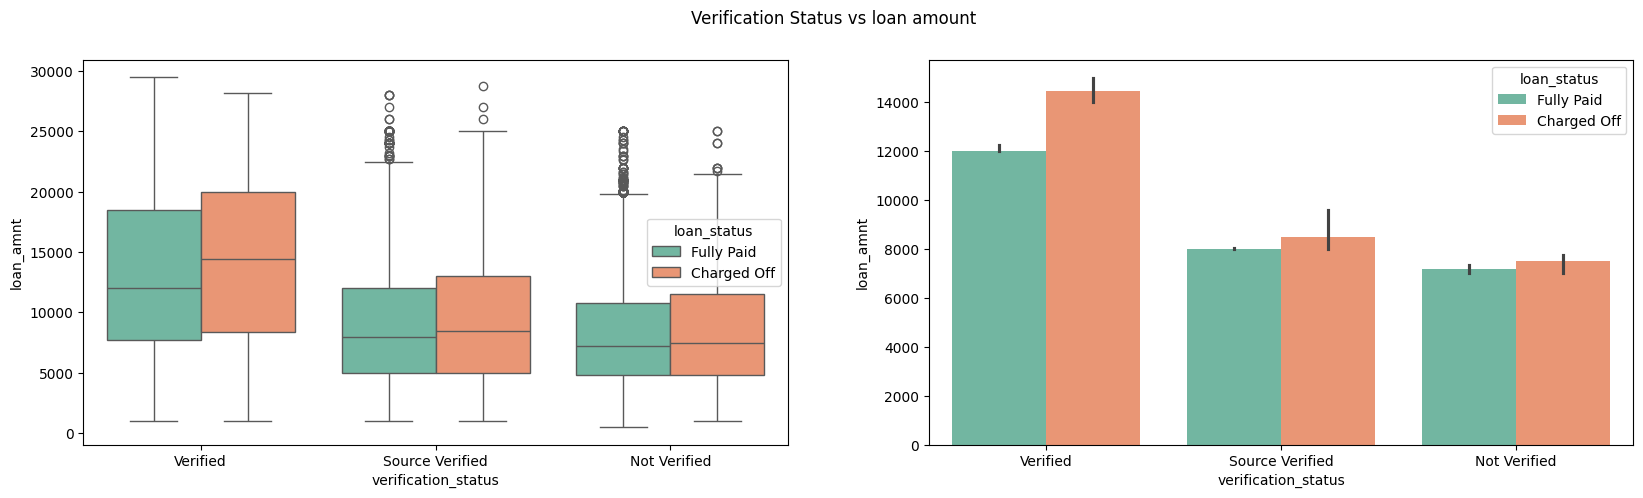

In [89]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan_dataframe,palette="Set2")
plt.suptitle('Verification Status vs loan amount')
plt.subplot(122)
sbn.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan_dataframe, estimator=np.median,palette="Set2")
plt.suptitle('Verification Status vs loan amount')
plt.show()

**Observations on 'loan_Amt' field:**</br>
<span style='background:yellow'>Across all the categories of verification_status, more the loan amount, higher chances of getting charged-off</span>

#### G.7.2 Plotting verification_status vs int_rate

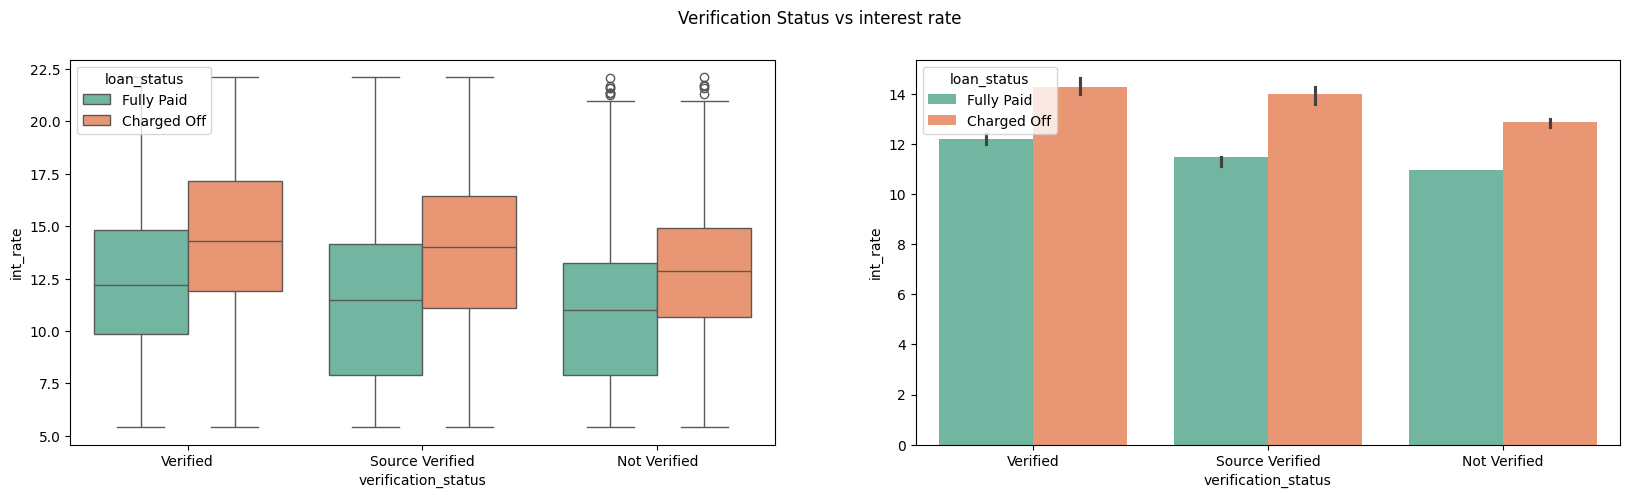

In [90]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=loan_dataframe,palette="Set2")

plt.subplot(122)
sbn.barplot(x='verification_status', y='int_rate', hue='loan_status', data=loan_dataframe, estimator=np.median,palette="Set2")
plt.suptitle('Verification Status vs interest rate')
plt.show()

**Observations on 'int_rate' field:**</br>
<span style='background:yellow'>Irrespective of verification status, higher the interest rate, higher are the chances of getting charged-off.</span>

#### G.7.2 verification_status vs dti

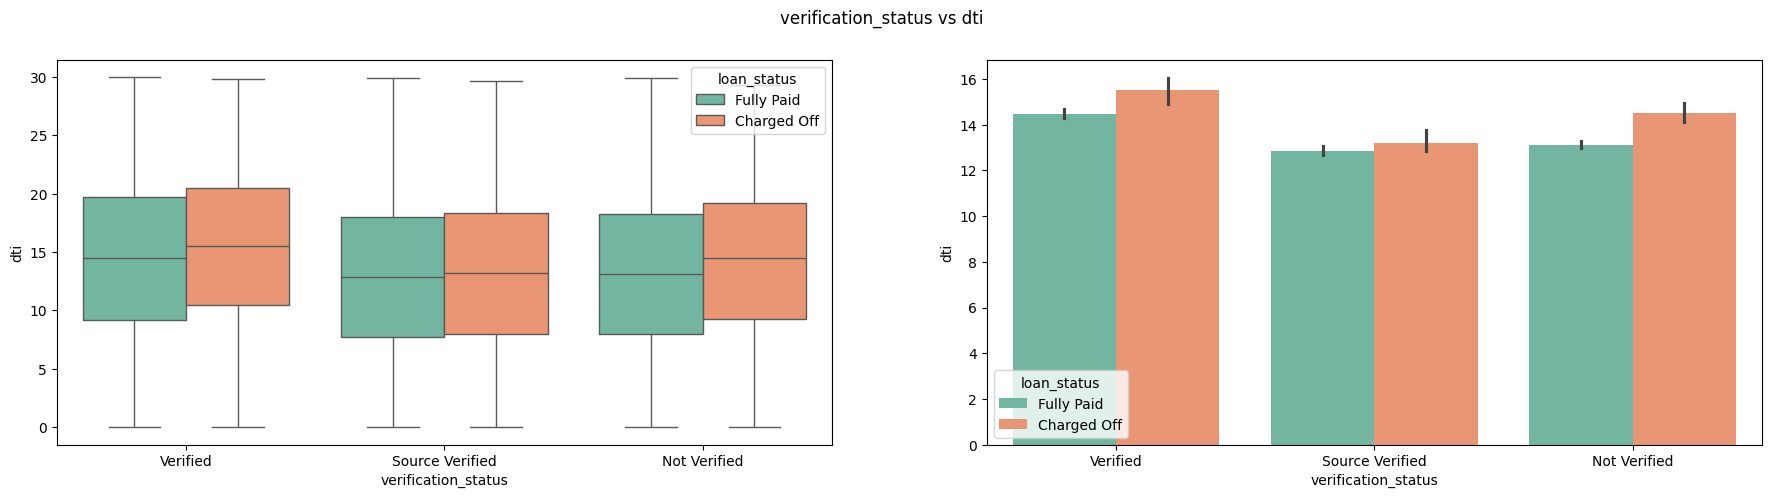

In [91]:
plt.figure(figsize=(22,5))
plt.subplot(121)
sbn.boxplot(x='verification_status', y='dti', hue='loan_status', data=loan_dataframe,palette="Set2")

plt.subplot(122)
sbn.barplot(x='verification_status', y='dti', hue='loan_status', data=loan_dataframe, estimator=np.median,palette="Set2")
plt.suptitle('verification_status vs dti')
plt.show()

**Observations on 'dti' field:**</br>
<span style='background:yellow'>Irrespective of verification_status, higher the dti value leads to higher charged-off</span>

### G.8 On Purpose column

#### G.8.1 Plotting purpose vs loan_status

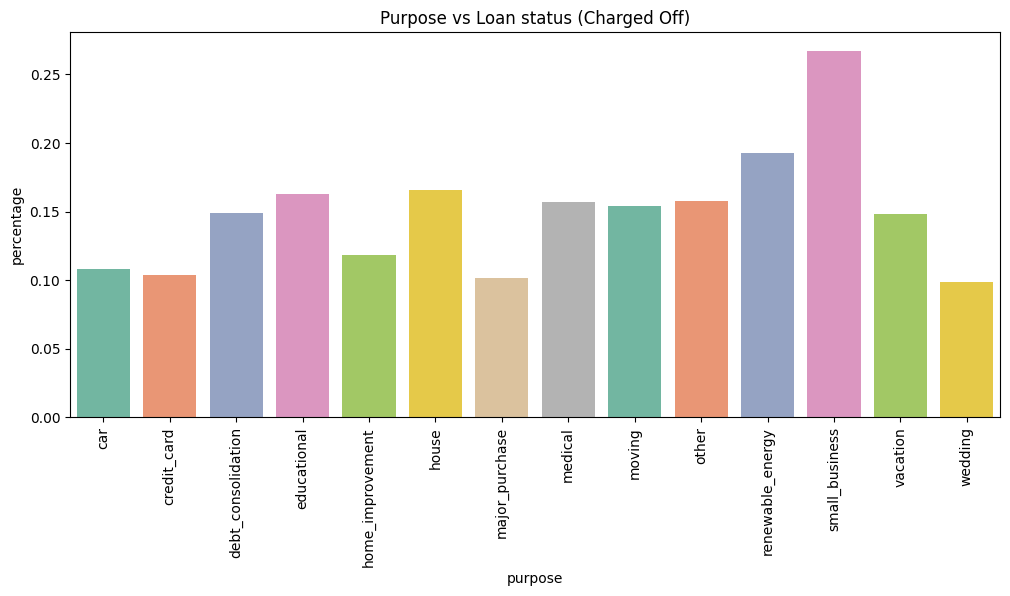

In [92]:
df1 = loan_dataframe.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df1['percentage'] = df1.groupby('purpose')['id'].transform(lambda x: x/x.sum())
df1 = df1[df1.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sbn.barplot(x='purpose', y='percentage', data=df1,palette="Set2")
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')
plt.show()

**Observations on 'purpose vs loan status' field:**</br>
<span style='background:yellow'>'small_business' purpose has the highest percentage charge off</span>

#### G.8.2 Plotting purpose vs loan_amnt

<Figure size 640x480 with 0 Axes>

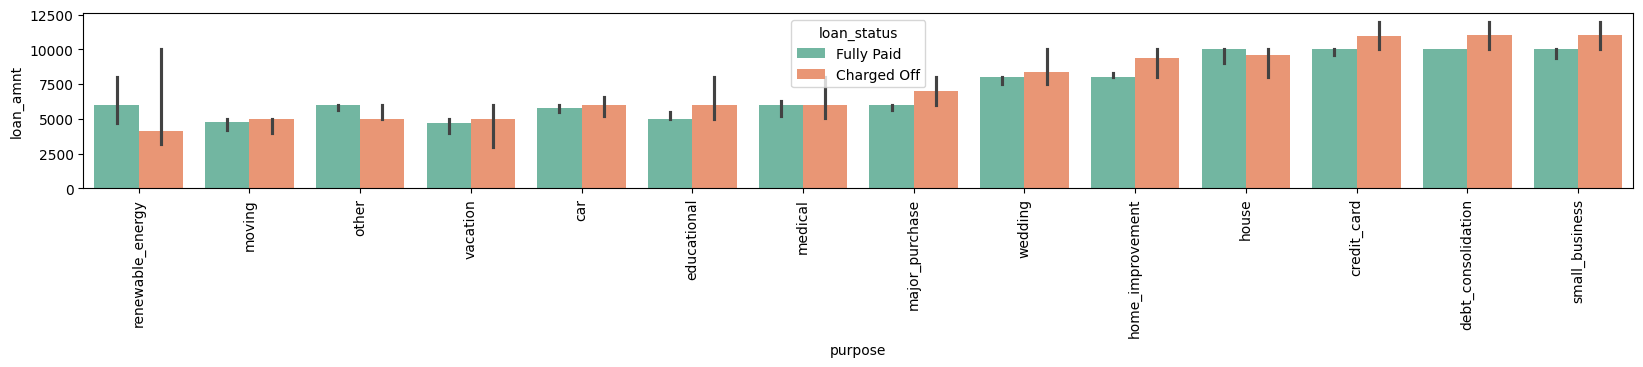

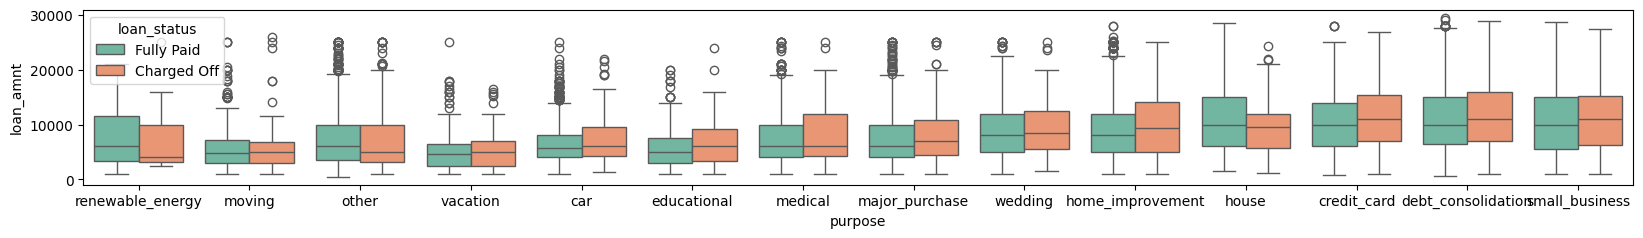

In [93]:
df2 = loan_dataframe.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sbn.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_dataframe, order=df2[df2.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median,palette="Set2")
plt.xticks(rotation=90)


plt.figure(figsize=(20,5))
plt.subplot(212)
sbn.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_dataframe, order=df2[df2.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose,palette="Set2")
plt.show()

**Observations on 'loan_amt' field:**</br>
<span style='background:yellow'>Borrowers taking higher loan amount for credit_card, small_business and debt_consolidation purposes  have higher default rate</span>

#### G.8.3 Plotting purpose vs int_rate

<Figure size 640x480 with 0 Axes>

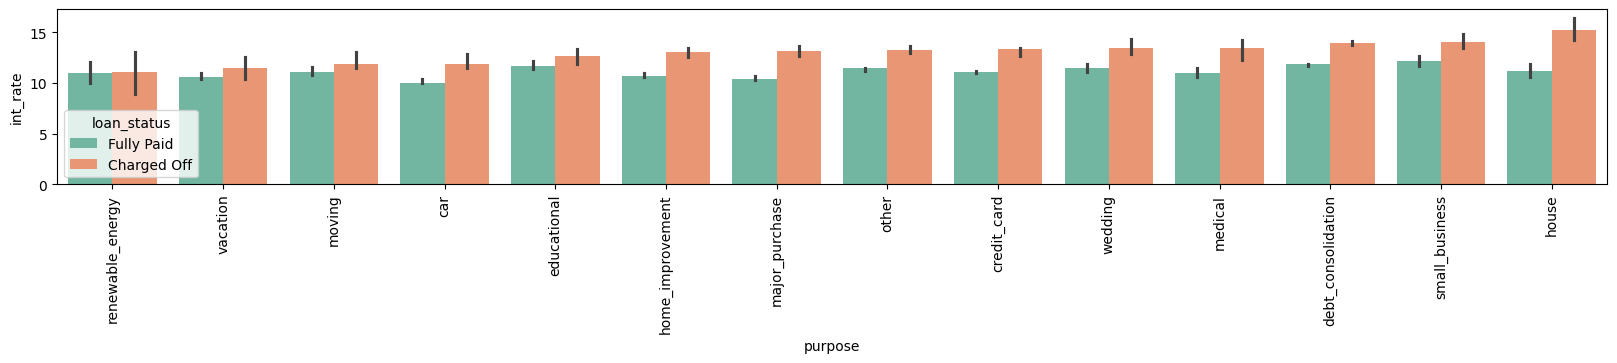

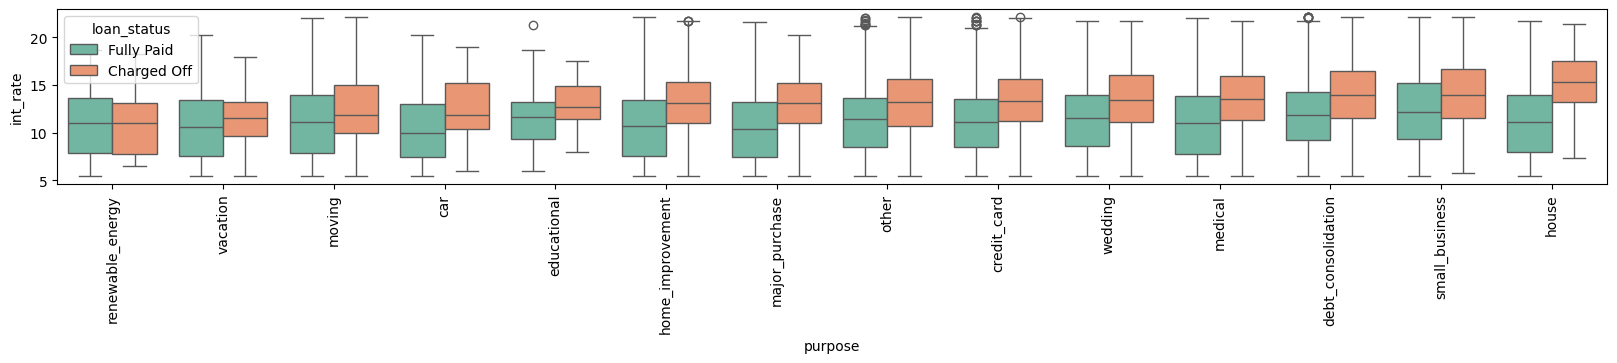

In [94]:
df3 = loan_dataframe.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df3[df3.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sbn.barplot(x='purpose', y='int_rate', hue='loan_status', data= loan_dataframe, estimator=np.median, order = purpose_ord,palette="Set2")
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sbn.boxplot(x='purpose', y='int_rate', hue='loan_status', data= loan_dataframe, order = purpose_ord,palette="Set2")
plt.xticks(rotation=90)
plt.show()

**Observations on 'annual_inc' field:**</br>
<span style='background:yellow'>Home loans with high interest rates are mostly defaulted.Small business and debt consolidation also have similar observation.</span>

## H. Bivariate Analysis (Numerical vs Numerical)

### H.1 PLotting Loan Amount vs Interest Rate

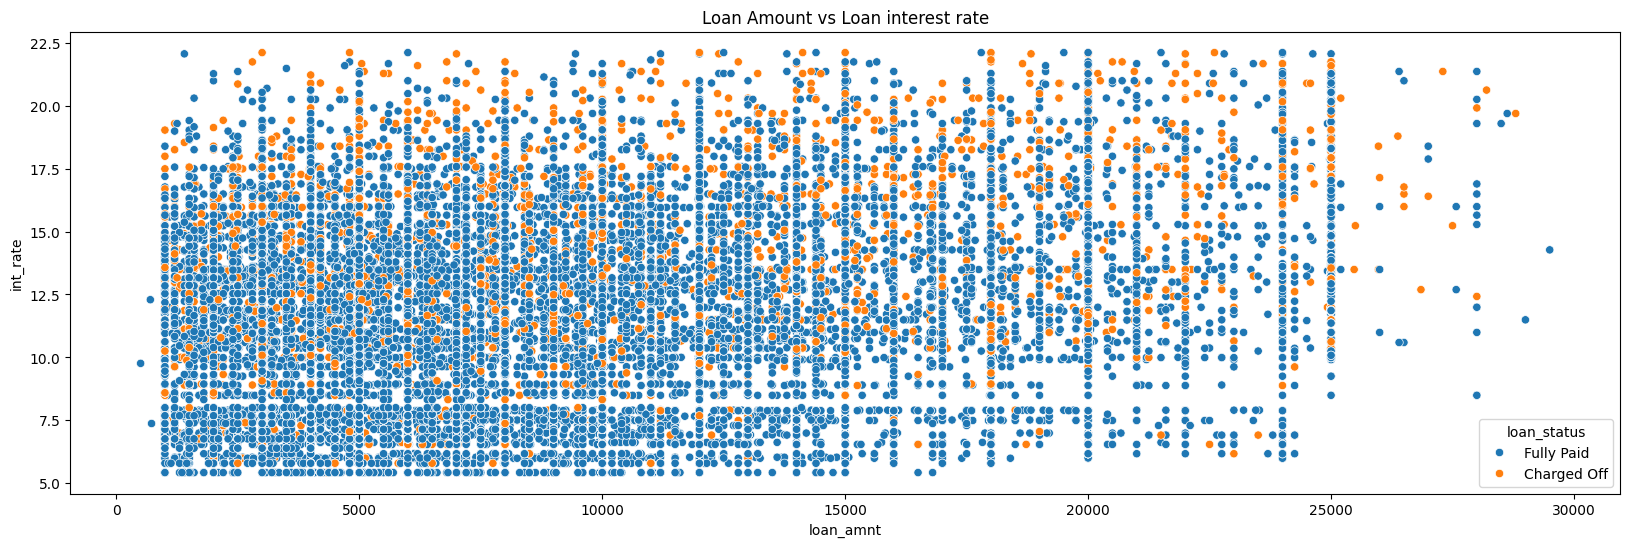

In [95]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sbn.scatterplot(x='loan_amnt', y='int_rate', data=loan_dataframe, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

**Observations on 'int rate' and loan amt field:**</br>
<span style='background:yellow'> Evenly spreaded across the graph, dont notice any specific pattern as such</span>

### H.2 Plotting Loan Amount vs Annual income

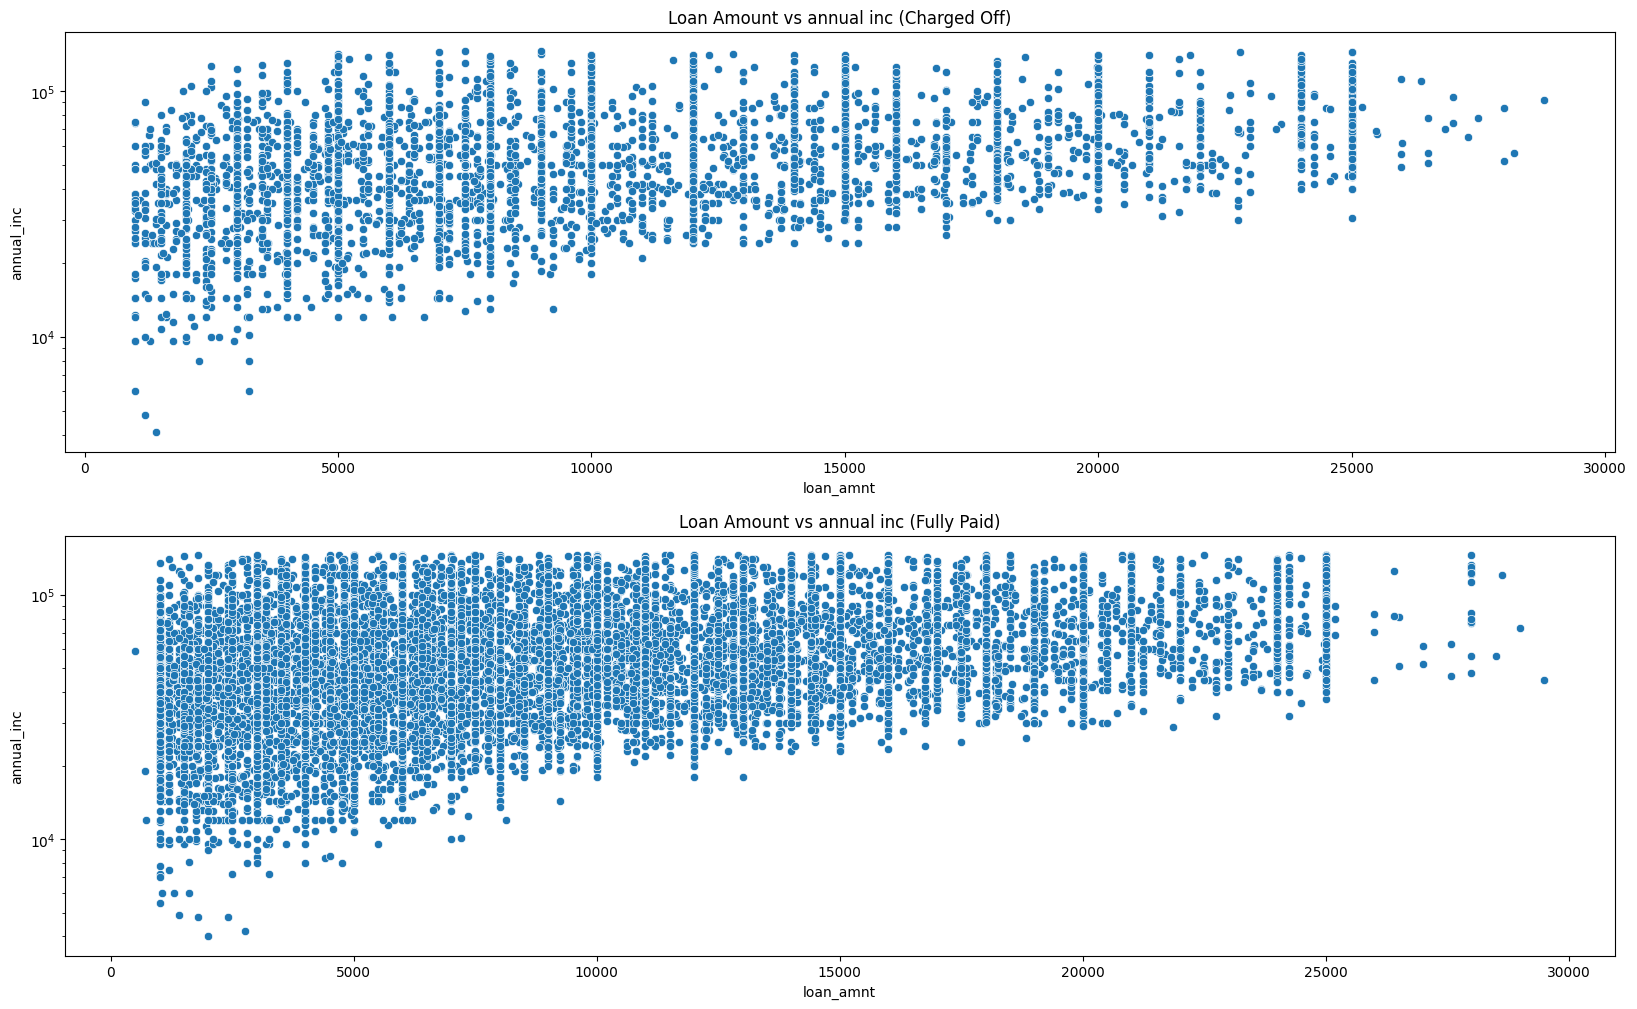

In [96]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sbn.scatterplot(x='loan_amnt', y='annual_inc', data=loan_dataframe[loan_dataframe.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs annual inc (Charged Off)')

plt.subplot(212)
sbn.scatterplot(x='loan_amnt', y='annual_inc', data=loan_dataframe[loan_dataframe.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs annual inc (Fully Paid)')
plt.show()

**Observations**</br>
<span style='background:yellow'>Since, we couldnot get enough actionable insights for 'Loan amount vs annual income' across loan status, we considered the logarithmic scales on both the axes for both plots.</span></br>
<span style='background:yellow'>As the annual income increases, and also the  loan amount, the borrowers are more likely to fully pay the loan (ully paid plot is more densed compared the charged-off plot).</span>

### H.3 Plotting Loan Amount vs dti

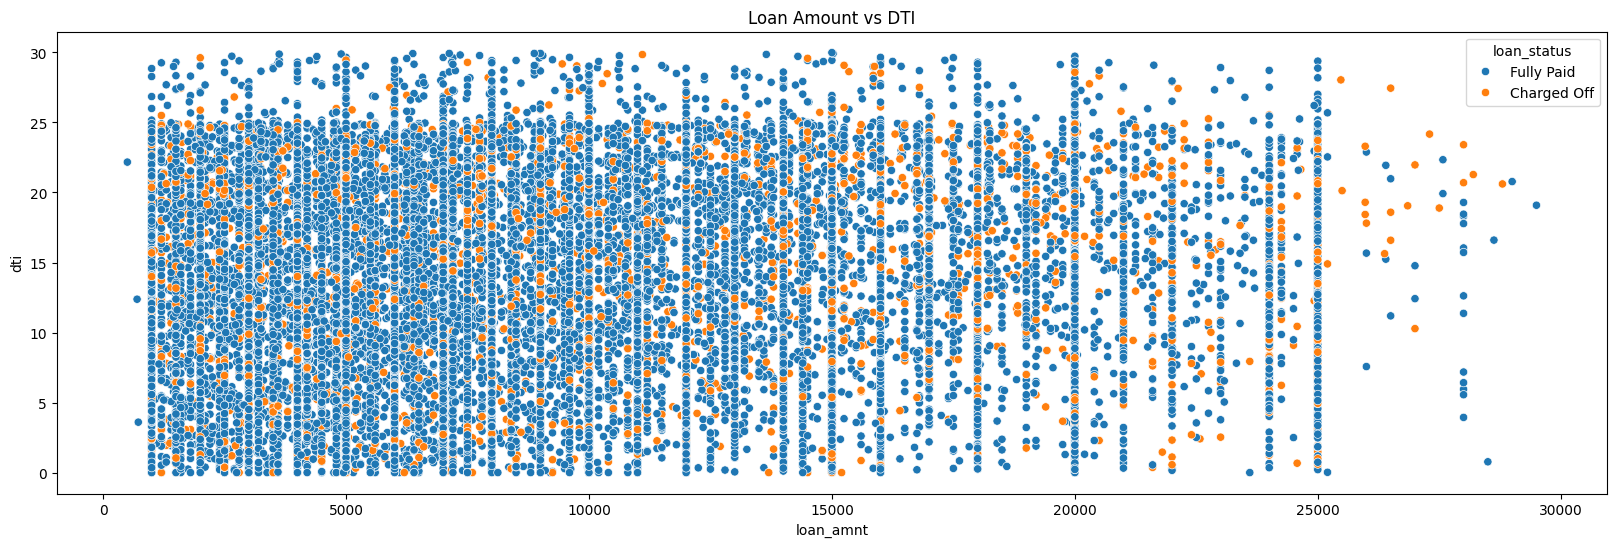

In [97]:
plt.figure(figsize=(20,6))
sbn.scatterplot(x='loan_amnt', y='dti', data=loan_dataframe, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

**Observations:**</br>
<span style='background:yellow'>There is no specific pattern identified.</span>

### H.4 Plotting Interest Rate vs DTI

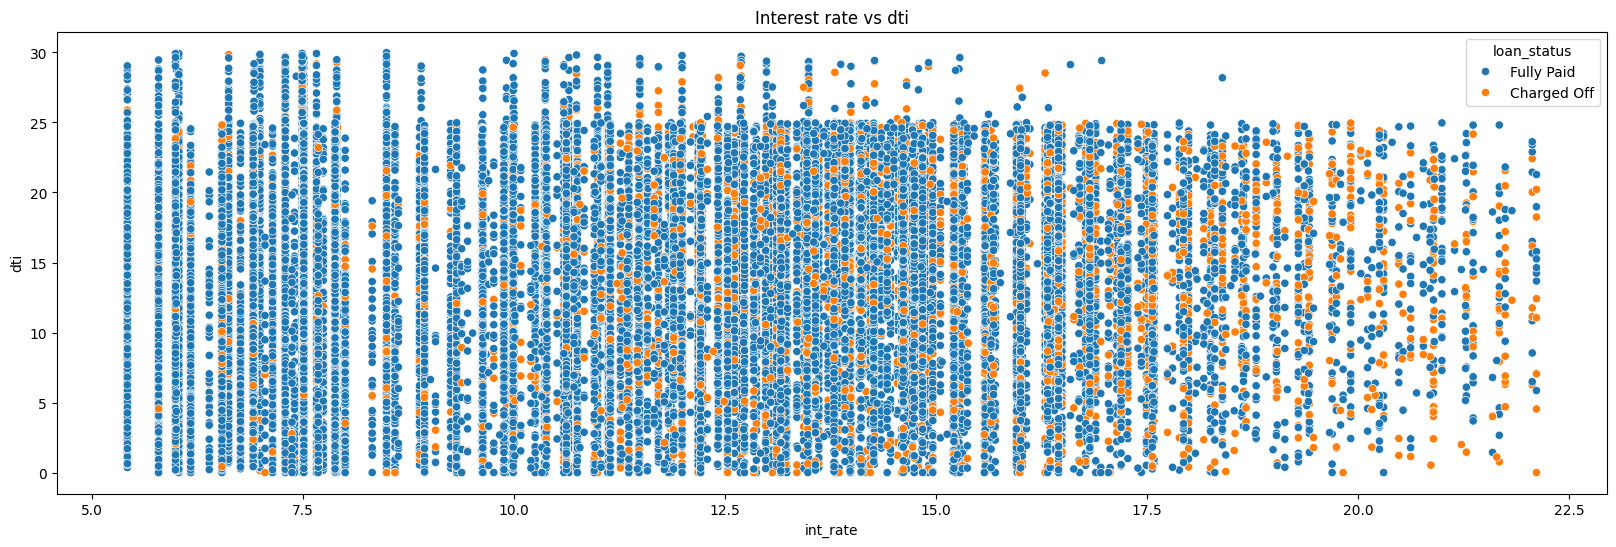

In [98]:
plt.figure(figsize=(20,6))
sbn.scatterplot(x='int_rate', y='dti', data=loan_dataframe, hue='loan_status')
plt.title('Interest rate vs dti')
plt.show()

**Observations**</br>
<span style='background:yellow'>Values are spread all accross, but we can see one thing here that irrespective of DTI, when the interest rates are high charged off loans are also high.</span>

## I. Correlation Analysis

In [99]:
#Removing the unwanted colums of installment, id, issue_yr and issue_mon
drp_columns = ['installment', 'id', 'issue_yr', 'issue_mon']
correlation_loan = loan_dataframe.drop(columns=drp_columns)
correlation_loan

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate grade  \
0         5000.0       5000.0           4975.0    36     10.65     B   
1         2500.0       2500.0           2500.0    60     15.27     C   
2         2400.0       2400.0           2400.0    36     15.96     C   
3        10000.0      10000.0          10000.0    36     13.49     C   
5         5000.0       5000.0           5000.0    36      7.90     A   
...          ...          ...              ...   ...       ...   ...   
39562     4800.0       4800.0           1100.0    36     10.28     C   
39573     7000.0       7000.0           1000.0    36     10.59     C   
39623     9000.0       9000.0            700.0    36     12.49     D   
39666    15450.0      15450.0            600.0    36     11.22     C   
39680     3000.0       3000.0            525.0    36     11.86     D   

      emp_length home_ownership  annual_inc verification_status    issue_d  \
0      10+ years           RENT     24000.0            Verified 2011-12-01   
1       < 1 year           RENT     30000.0     Source Verified 2011-12-01   
2      10+ years           RENT     12252.0        Not Verified 2011-12-01   
3      10+ years           RENT     49200.0     Source Verified 2011-12-01   
5        3 years           RENT     36000.0     Source Verified 2011-12-01   
...          ...            ...         ...                 ...        ...   
39562     1 year           RENT     35000.0        Not Verified 2007-11-01   
39573    3 years       MORTGAGE     63500.0        Not Verified 2007-11-01   
39623    8 years       MORTGAGE     39000.0        Not Verified 2007-10-01   
39666    2 years       MORTGAGE     40000.0        Not Verified 2007-08-01   
39680    2 years       MORTGAGE     36153.0        Not Verified 2007-08-01   

       loan_status             purpose zip_code addr_state    dti  \
0       Fully Paid         credit_card    860xx         AZ  27.65   
1      Charged Off                 car    309xx         GA   1.00   
2       Fully Paid      small_business    606xx         IL   8.72   
3       Fully Paid               other    917xx         CA  20.00   
5       Fully Paid             wedding    852xx         AZ  11.20   
...            ...                 ...      ...        ...    ...   
39562   Fully Paid  debt_consolidation    226xx         VA   7.51   
39573   Fully Paid  debt_consolidation    853xx         AZ   8.50   
39623  Charged Off  debt_consolidation    207xx         MD   5.08   
39666  Charged Off  debt_consolidation    201xx         VA  13.50   
39680   Fully Paid  debt_consolidation    479xx         IN   7.47   

       pub_rec_bankruptcies  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
5                       0.0  
...                     ...  
39562                   1.0  
39573                   1.0  
39623                   1.0  
39666                   1.0  
39680                   1.0  

[33193 rows x 17 columns]

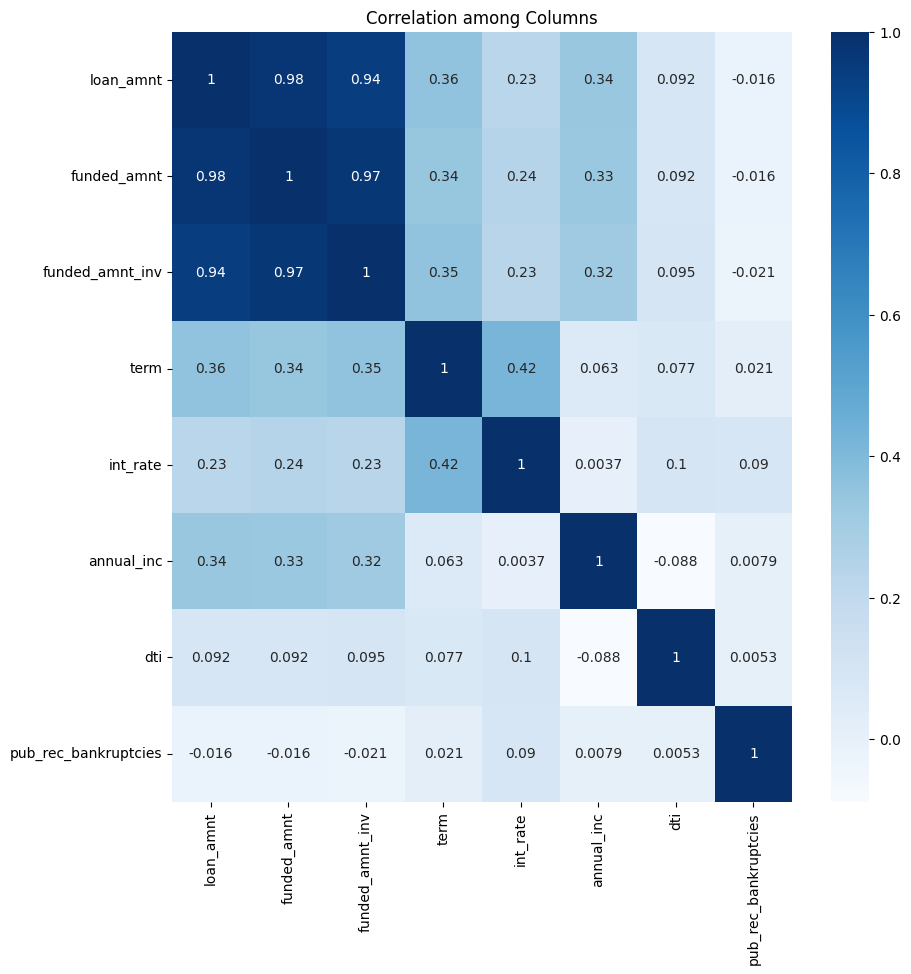

In [100]:
#Finding correlation matric
correlation_matrix = correlation_loan.corr(numeric_only=True)
plt.figure(figsize=(10,10))
#plotting correlatioon matric on a heat map
sbn.heatmap(correlation_matrix, annot = True, cmap='Blues')
plt.title("Correlation among Columns")
plt.show()

**Observations:**
1. **Negative Correlation**:
    -  loan_amnt has negative correlation with pub_rec_bankrupticies
    -  funded_amnt has negative correlation with pub_rec_bankrupticies
    -  annual income has a negative correlation with dti
2. **Moderate Correlation**:
    -  loan_amnt has moderate correlation with term
    -  term has moderate correlation with int_rate
3. **Strong Correlation**:
    -  loan_amnt has strong correlation with funded_amnt
    -  funded_amnt_inv has strong correlation with funded_amnt